In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import h5py
from matplotlib.colors import LogNorm
from tqdm import tqdm
import time

jet_data_path = Path("/home/soumodip/Python/MSc_Project/Finalized_Project/Training_data_75k_100GeV/JJ_Pipeline/JJ_Datas/jet_data_jj.h5")
full_jet_npy_file_path = Path("/home/soumodip/Python/MSc_Project/Finalized_Project/Training_data_75k_100GeV/JJ_Pipeline/npy_Files_JJ/Full_jet_npy_files")
core_jet_npy_file_path = Path("/home/soumodip/Python/MSc_Project/Finalized_Project/Training_data_75k_100GeV/JJ_Pipeline/npy_Files_JJ/Core_jet_npy_files")

In [2]:
a = 0.8
b = 0.2
jet_core_r = 0.15

pixel_dim_full = 0.05
grids_full = int(round((2 * a) / pixel_dim_full))
pixel_dim_core = 0.02
grids_core = int(round((2 * b) / pixel_dim_core))

eta_range_full = (-a, a)
eta_range_core = (-b, b)
phi_range_full = (-a, a)
phi_range_core = (-b, b)

normalize_intensity = True

BATCH_SIZE = 10000

tag_to_label = {
    "quark": 0,
    "antiquark": 1,
    "gluon": 2,
    "unmatched": 3}

In [3]:
def center_jet(constituents):
    
    pt = constituents[:, 1]
    eta = constituents[:, 2]
    phi = constituents[:, 3]
    
    total_pt = np.sum(pt)
        
    eta_centroid = np.sum(pt * eta) / total_pt
    phi_centroid = np.sum(pt * phi) / total_pt

    centered_eta = eta - eta_centroid
    centered_phi = phi - phi_centroid
    centered_phi = np.arctan2(np.sin(centered_phi), np.cos(centered_phi))
    
    centered_constituents = constituents.copy()
    centered_constituents[:, 2] = centered_eta
    centered_constituents[:, 3] = centered_phi
    
    return centered_constituents

In [4]:
def rotate_jet(constituents):
    pt = constituents[:, 1]
    eta = constituents[:, 2]
    phi = constituents[:, 3]
    
    sorted_indices = np.argsort(pt)[::-1]
    
    if len(sorted_indices) < 2:
        return constituents
    
    second_eta = eta[sorted_indices[1]]
    second_phi = phi[sorted_indices[1]]
    
    theta = np.arctan2(second_phi, second_eta)
    
    rotated_eta = eta * np.cos(-theta) - phi * np.sin(-theta)
    rotated_phi = eta * np.sin(-theta) + phi * np.cos(-theta)
    
    rotated_constituents = constituents.copy()
    rotated_constituents[:, 2] = rotated_eta
    rotated_constituents[:, 3] = rotated_phi
    
    return rotated_constituents

In [5]:
def create_jet_image(constituents, grid_size, eta_range, phi_range, normalize=True):
    pt = constituents[:, 1]
    eta = constituents[:, 2]
    phi = constituents[:, 3]
        
    image, _, _ = np.histogram2d(
        eta, phi,
        bins=[np.linspace(*eta_range, grid_size + 1), np.linspace(*phi_range, grid_size + 1)],
        weights=pt)
    
    if normalize and np.sum(image) > 0:
        image = image / np.sum(image)
    
    return image

In [6]:
def plot_sample_images(images, labels, label_mapping, eta_range, phi_range, num_samples):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        label_indices = np.where(labels == label)[0]
        if len(label_indices) == 0:
            continue
        
        fig, axs = plt.subplots(1, min(num_samples, len(label_indices)), figsize=(5 * num_samples, 5), constrained_layout=True)
        axs = np.atleast_1d(axs)
                
        for idx, ax in zip(label_indices[:num_samples], axs):
            im = ax.imshow(images[idx], origin='lower',
               extent=[eta_range[0], eta_range[1], phi_range[0], phi_range[1]],
               cmap='jet', aspect='equal', norm=LogNorm(vmin=1e-3, vmax=1))
            tag_name = [k for k, v in label_mapping.items() if v == label][0]
            ax.set_title(f"{tag_name.capitalize()} Jet", fontsize=12)
            ax.set_xlabel(r'$\Delta \eta$', fontsize=10)
            ax.set_ylabel(r'$\Delta \phi$', fontsize=10)
            ax.set_xticks(np.linspace(eta_range[0], eta_range[1], 5))
            ax.set_yticks(np.linspace(phi_range[0], phi_range[1], 5))
            cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
            cbar.set_label(r'$p_{T}$ (GeV)', fontsize=10)
            cbar.ax.tick_params(labelsize=8)
            ax.tick_params(labelsize=10)
        
        plt.show()


Total events in dataset: 68056

Processing batch: Events 0 to 9999


Batch 0: 100%|███████████████████████████| 10000/10000 [00:27<00:00, 362.03it/s]


Batch 0-9999 saved: 19069 images
Time taken: 27.78 seconds



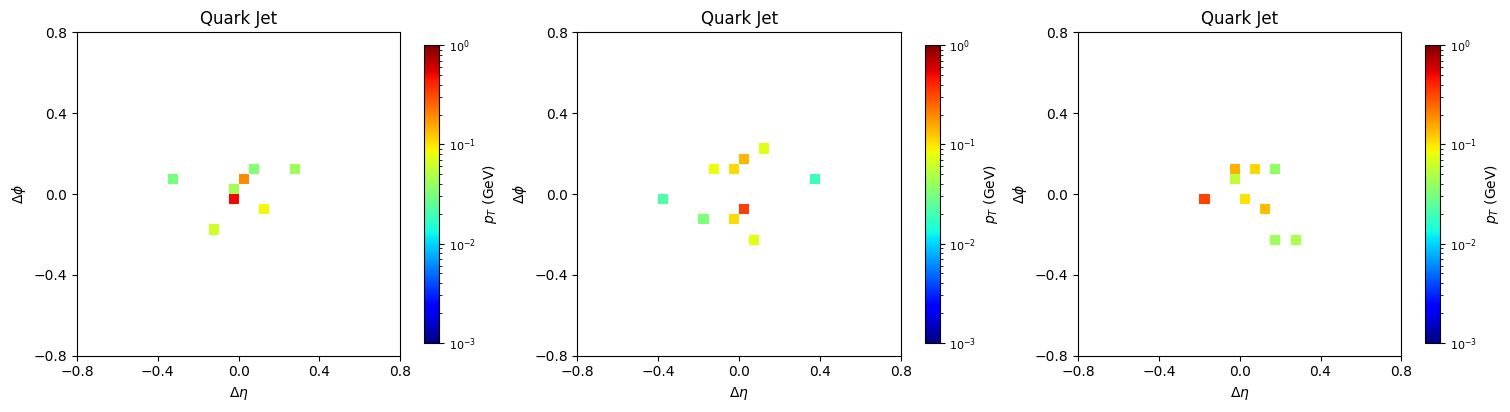

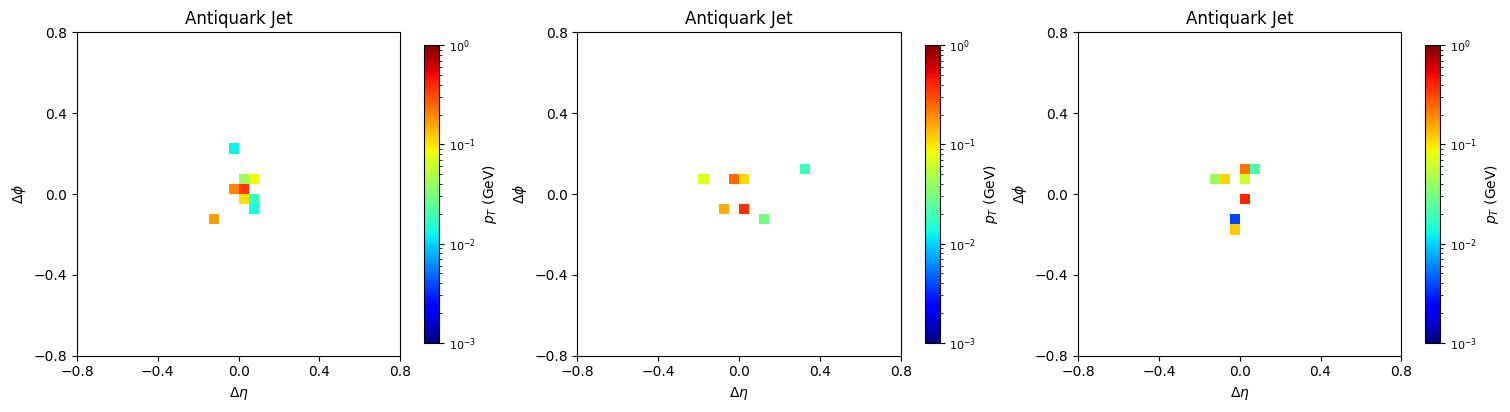

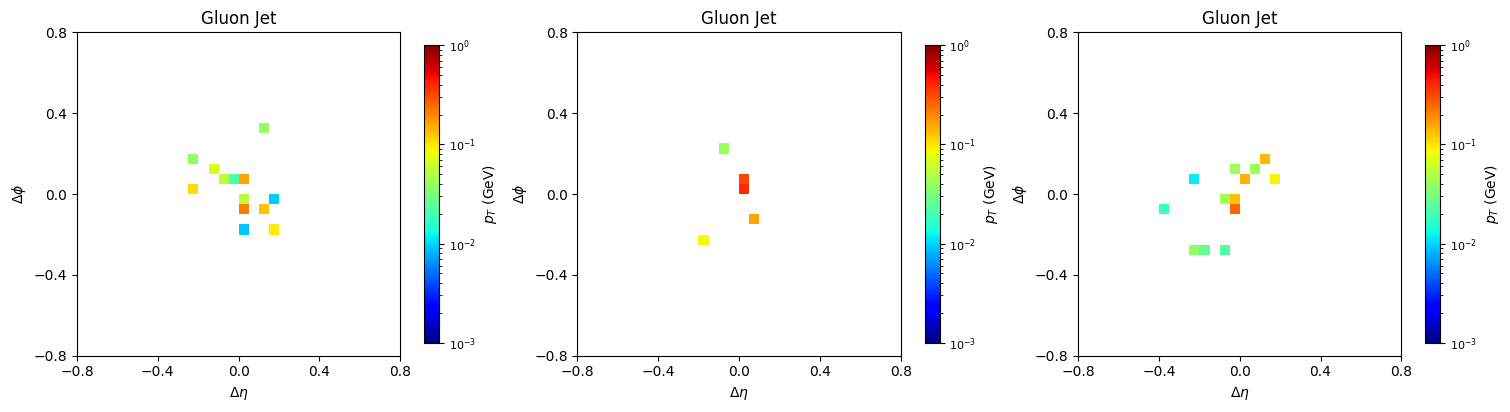

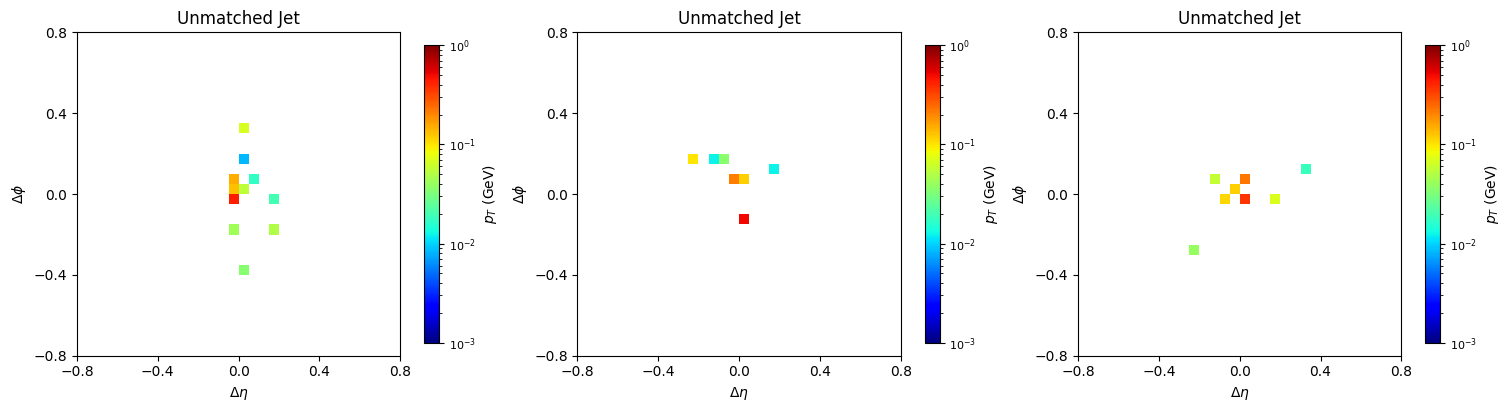


Processing batch: Events 10000 to 19999


Batch 10000: 100%|███████████████████████| 10000/10000 [00:27<00:00, 368.96it/s]


Batch 10000-19999 saved: 19030 images
Time taken: 27.19 seconds



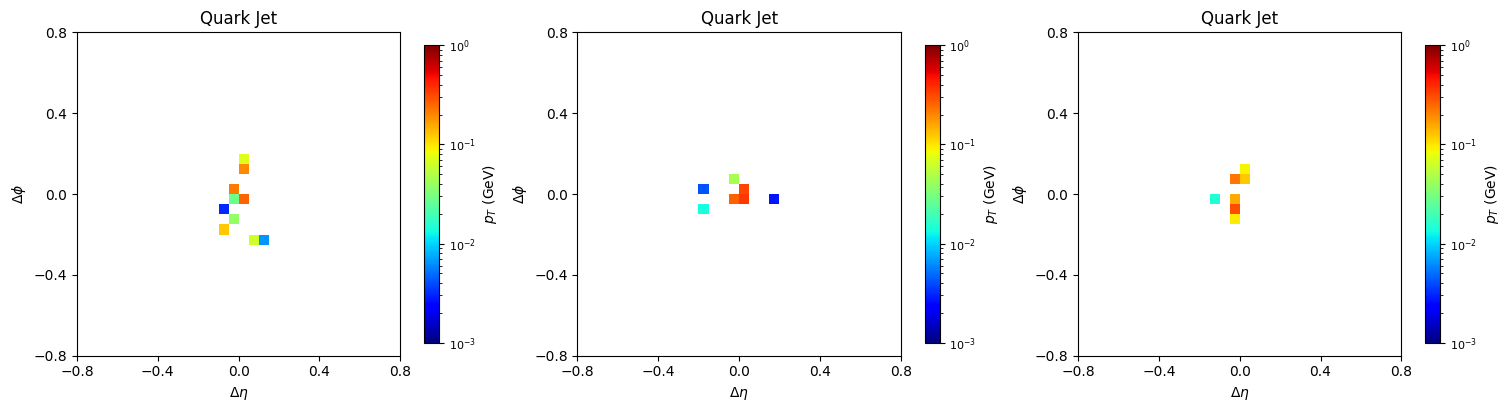

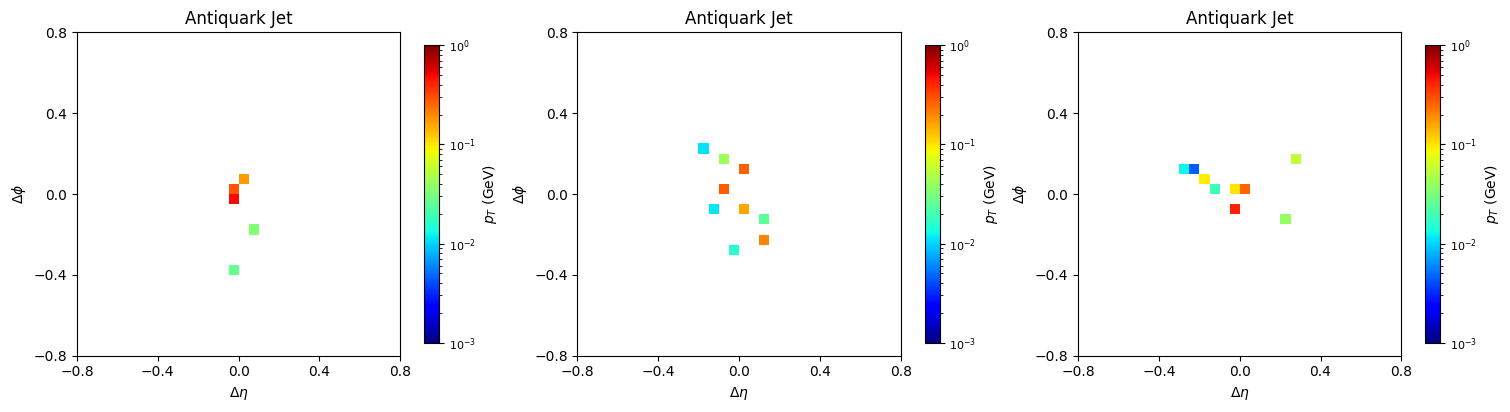

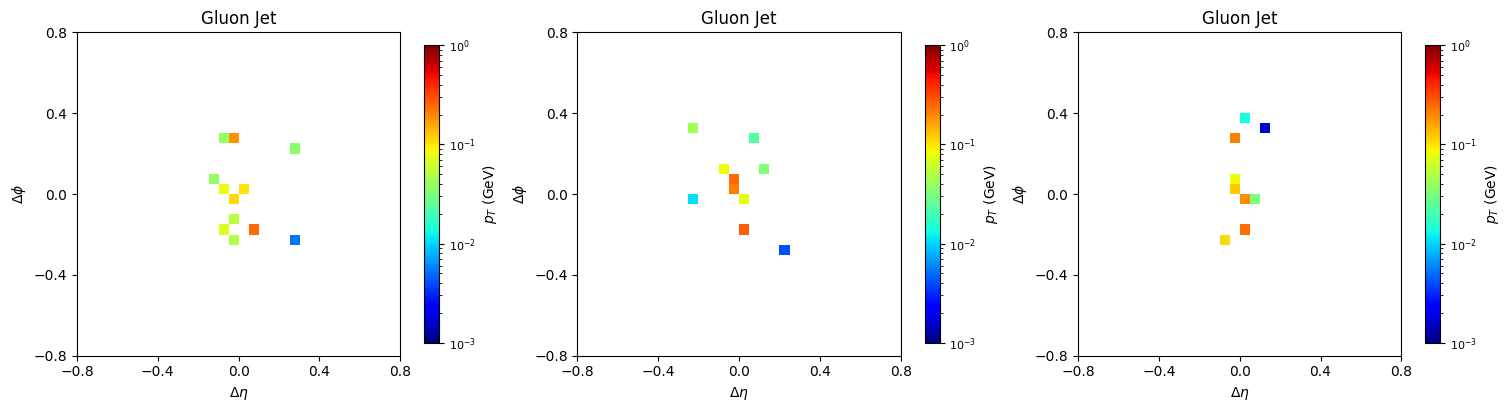

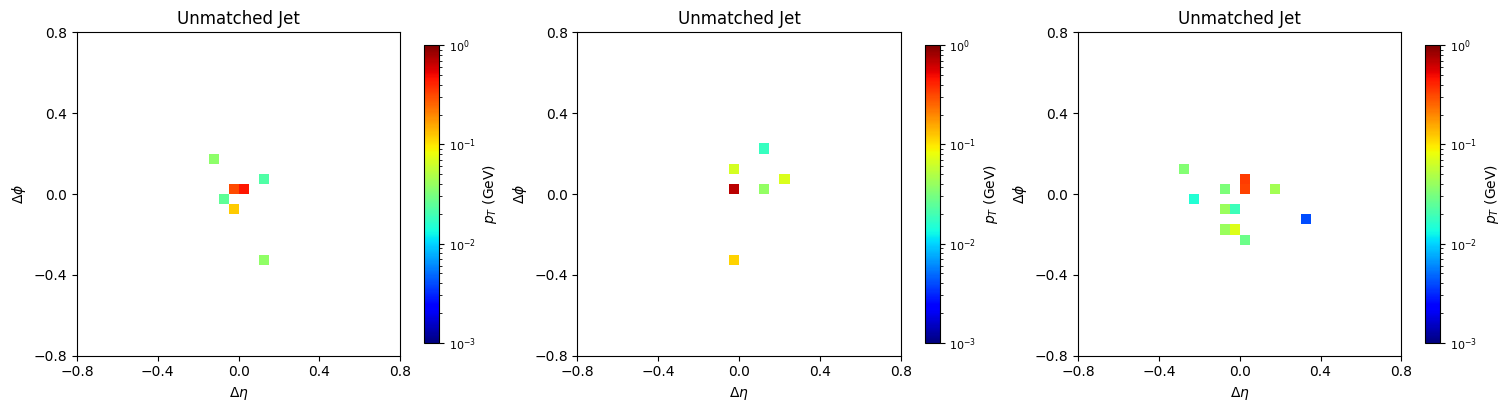


Processing batch: Events 20000 to 29999


Batch 20000: 100%|███████████████████████| 10000/10000 [00:27<00:00, 367.20it/s]


Batch 20000-29999 saved: 19093 images
Time taken: 27.33 seconds



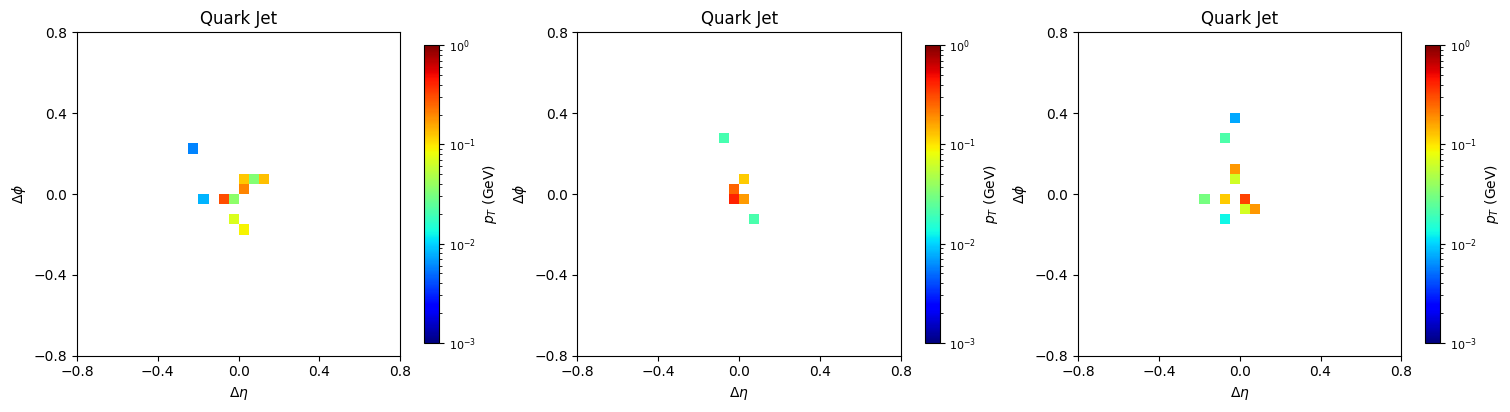

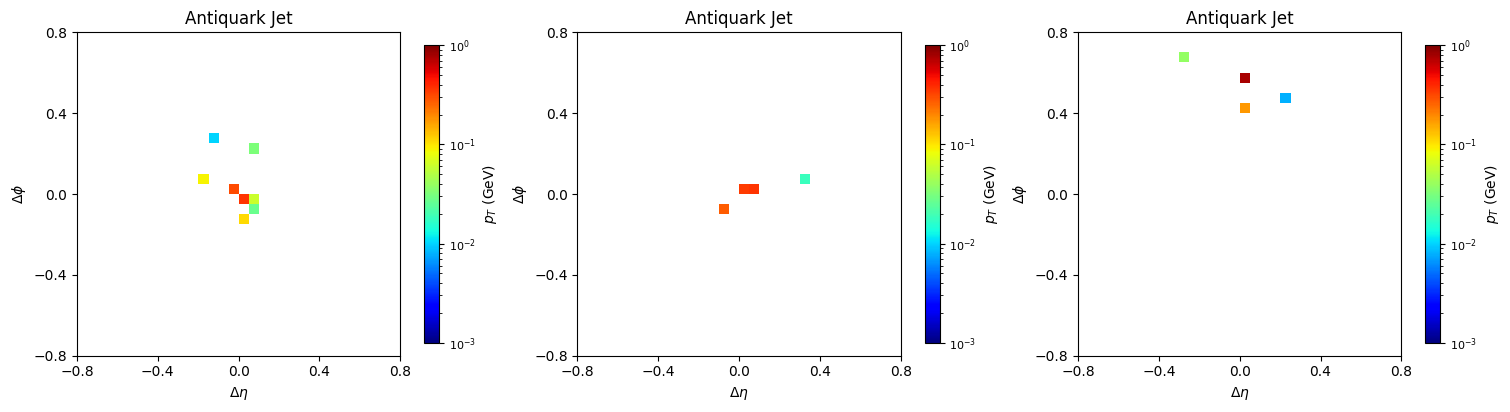

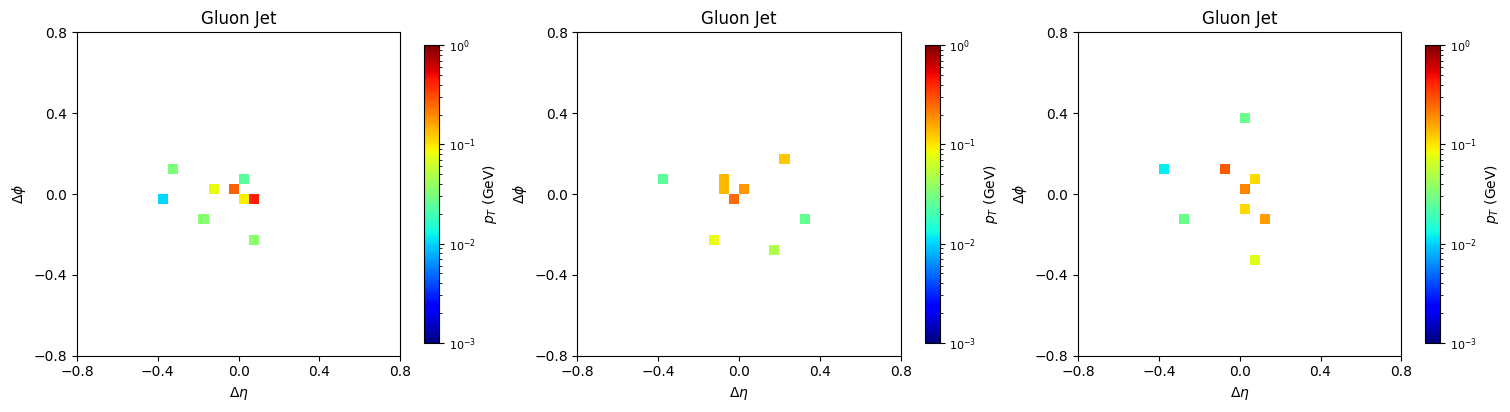

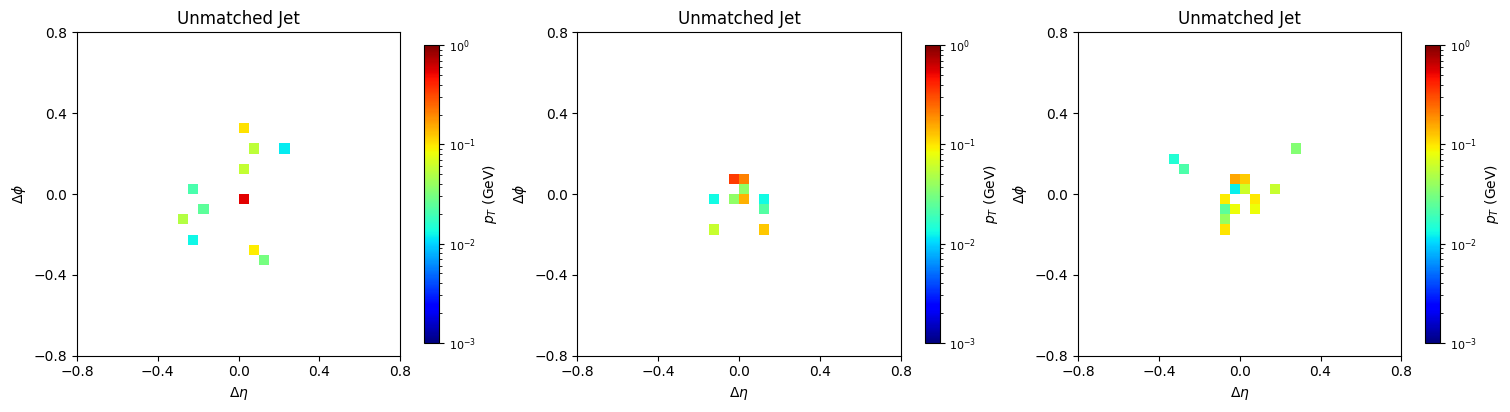


Processing batch: Events 30000 to 39999


Batch 30000: 100%|███████████████████████| 10000/10000 [00:28<00:00, 356.09it/s]


Batch 30000-39999 saved: 19104 images
Time taken: 28.27 seconds



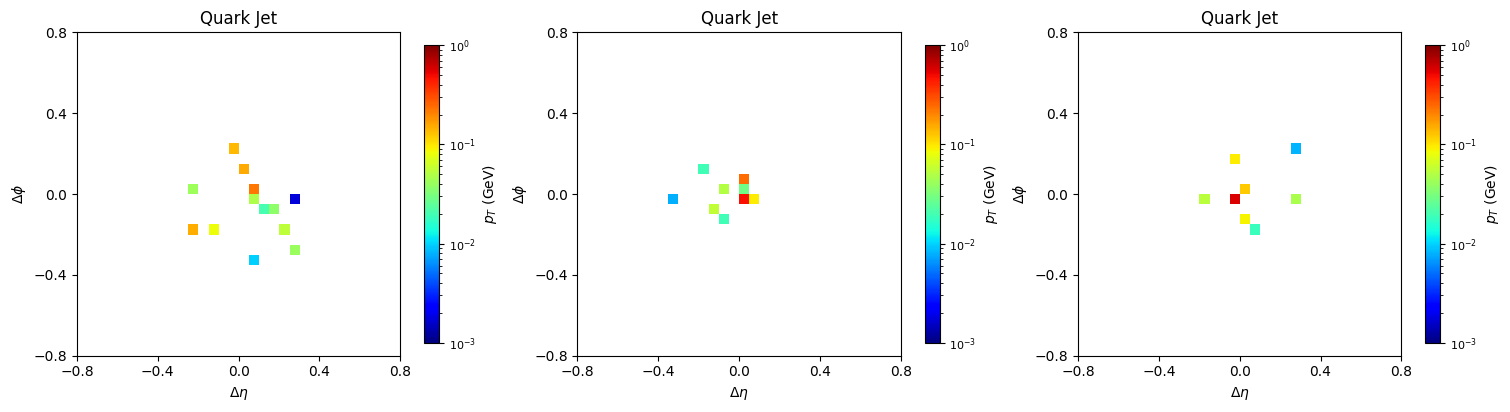

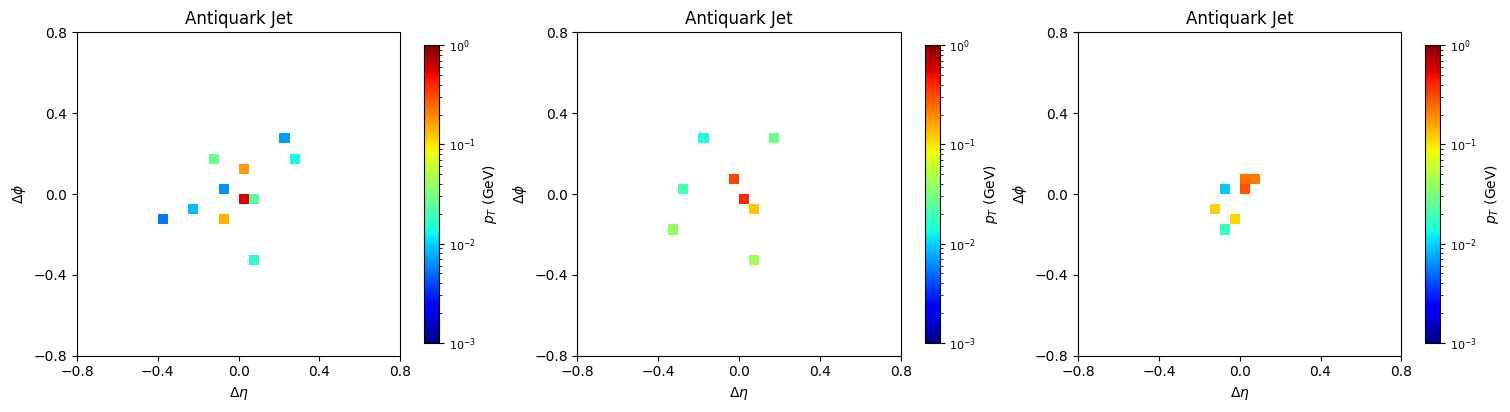

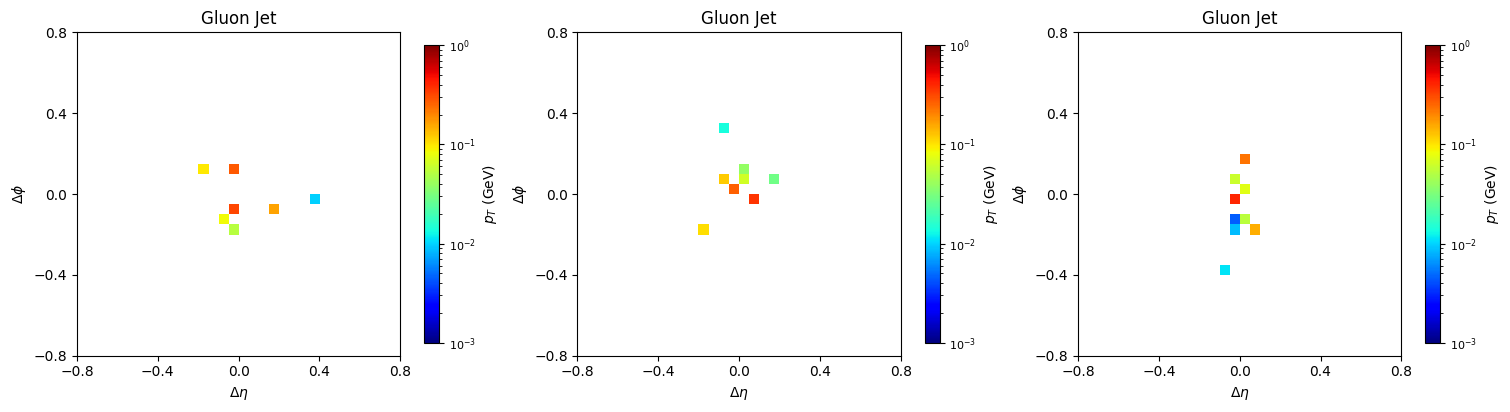

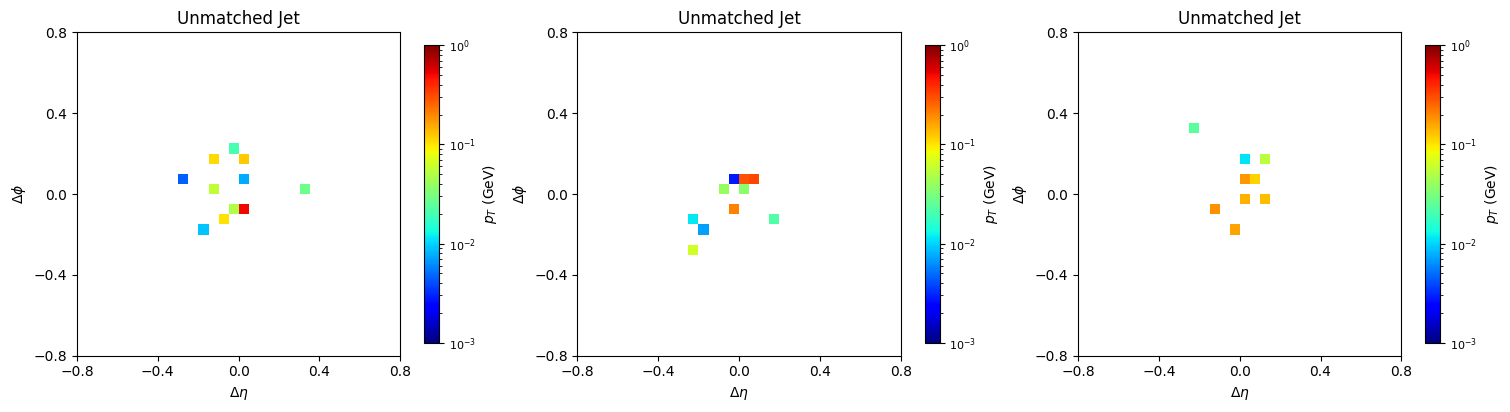


Processing batch: Events 40000 to 49999


Batch 40000: 100%|███████████████████████| 10000/10000 [00:26<00:00, 371.50it/s]


Batch 40000-49999 saved: 19116 images
Time taken: 27.06 seconds



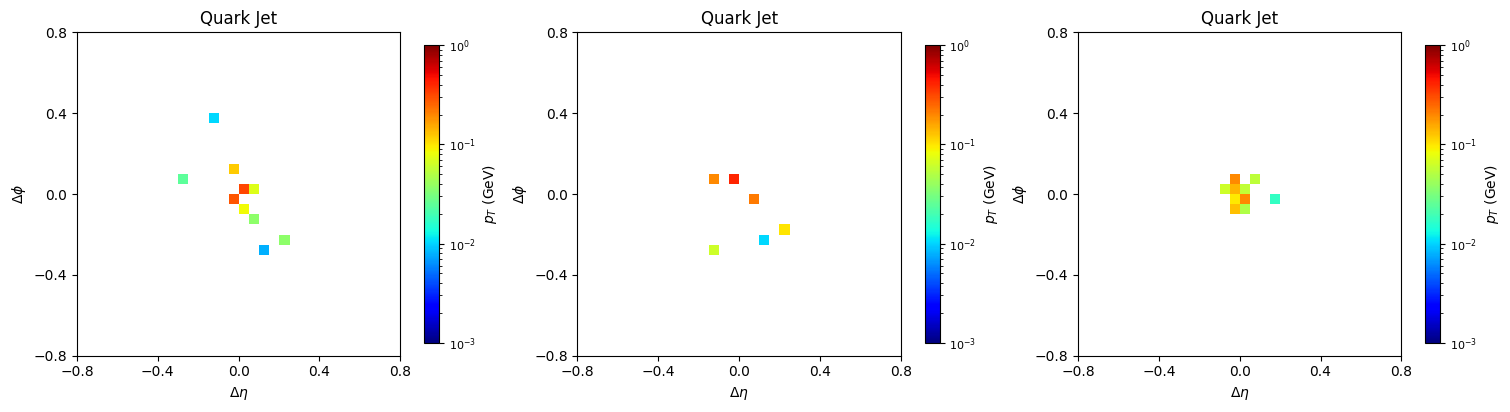

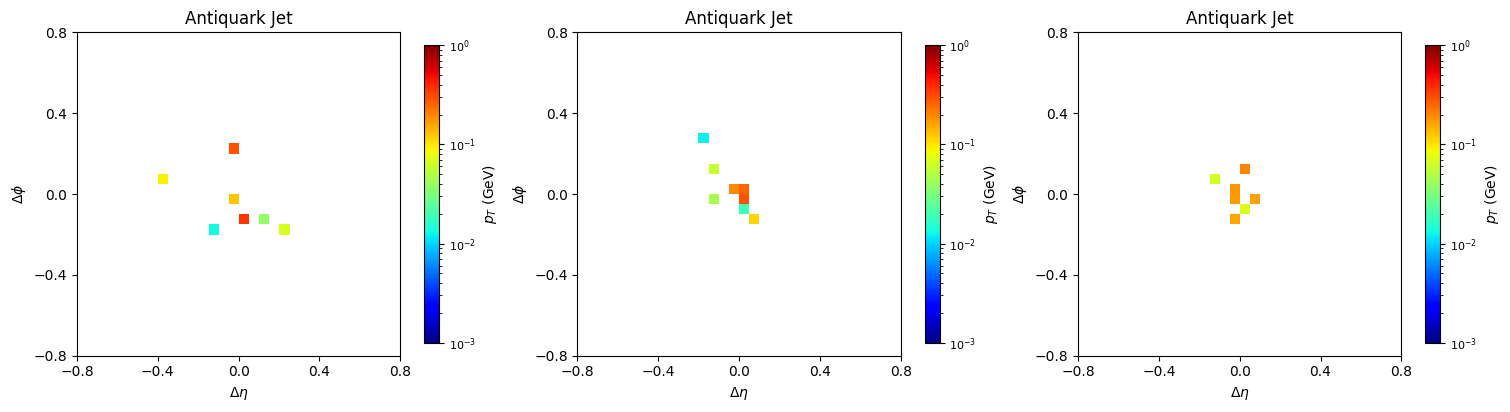

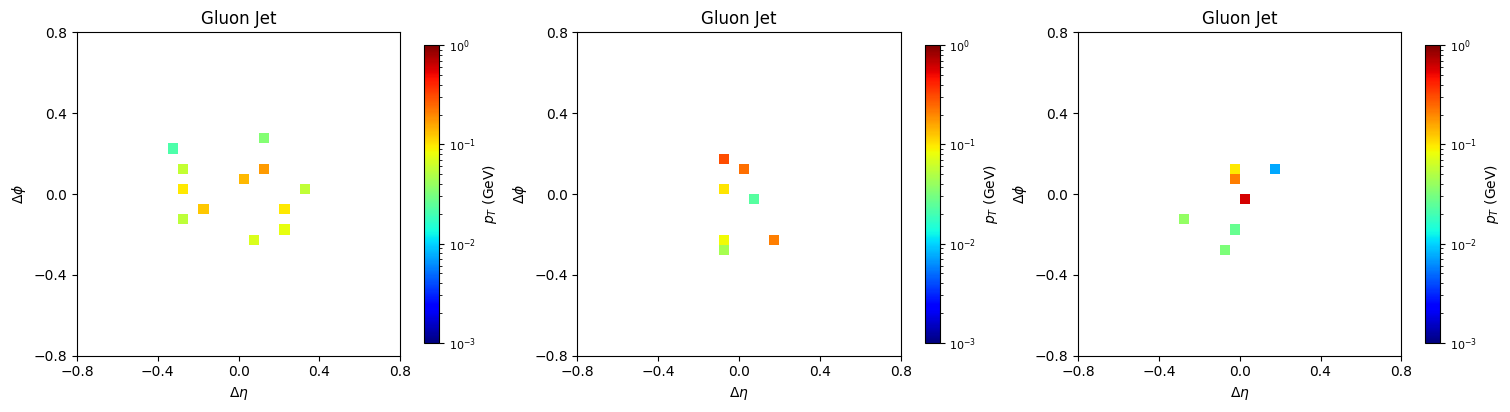

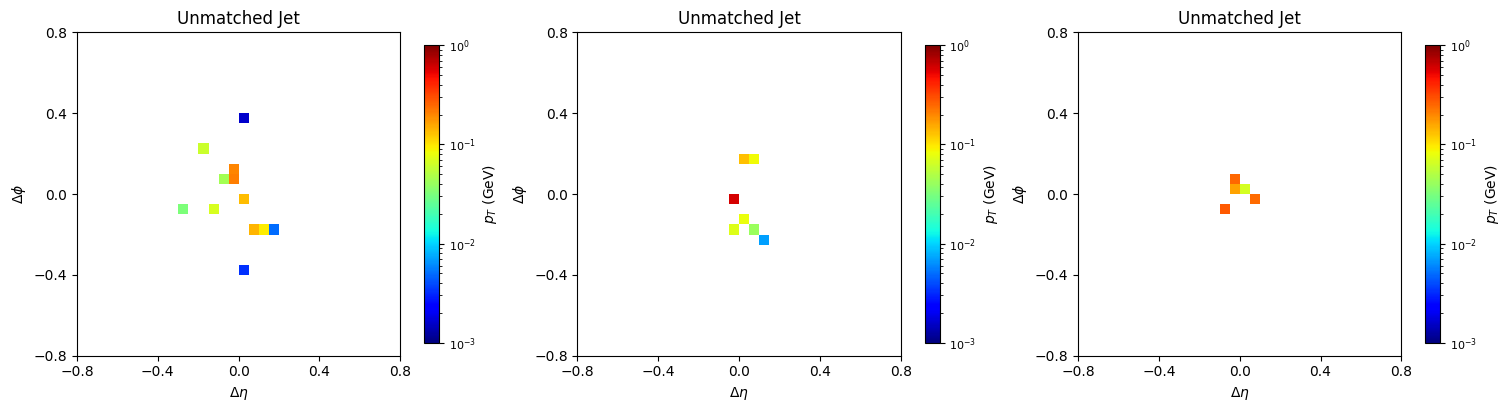


Processing batch: Events 50000 to 59999


Batch 50000: 100%|███████████████████████| 10000/10000 [00:28<00:00, 351.80it/s]


Batch 50000-59999 saved: 19031 images
Time taken: 28.55 seconds



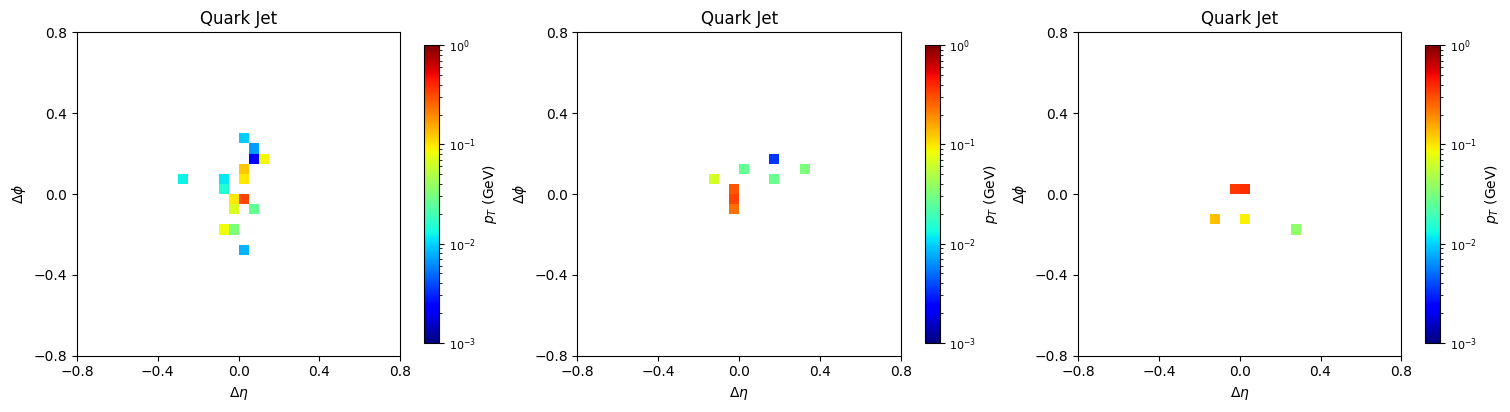

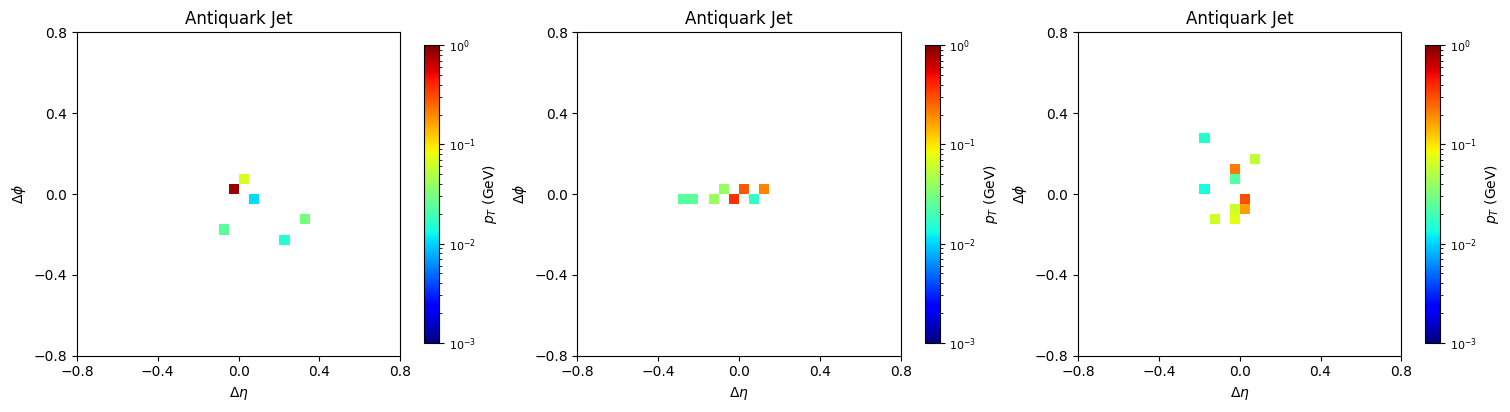

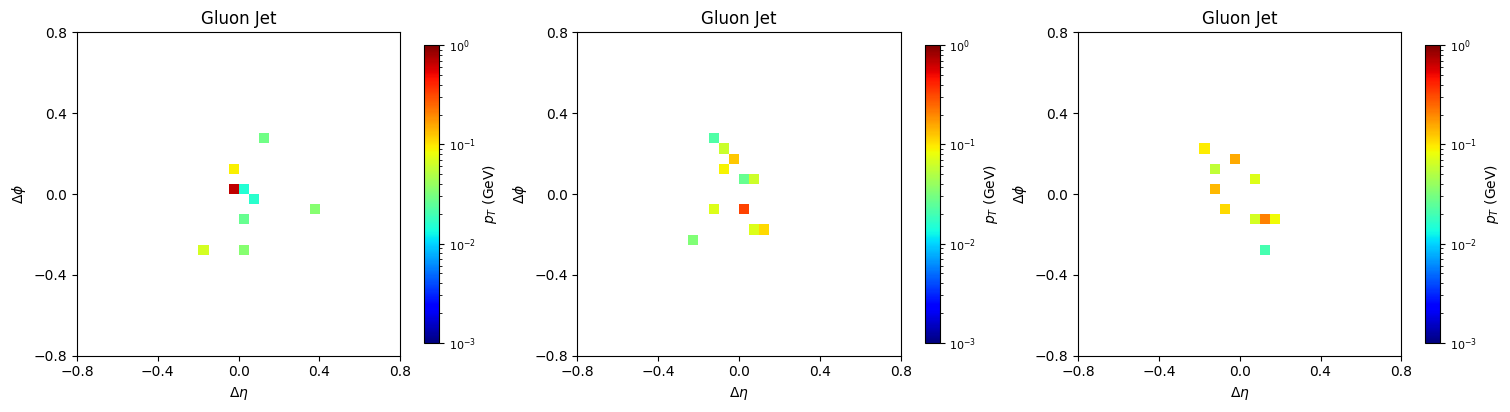

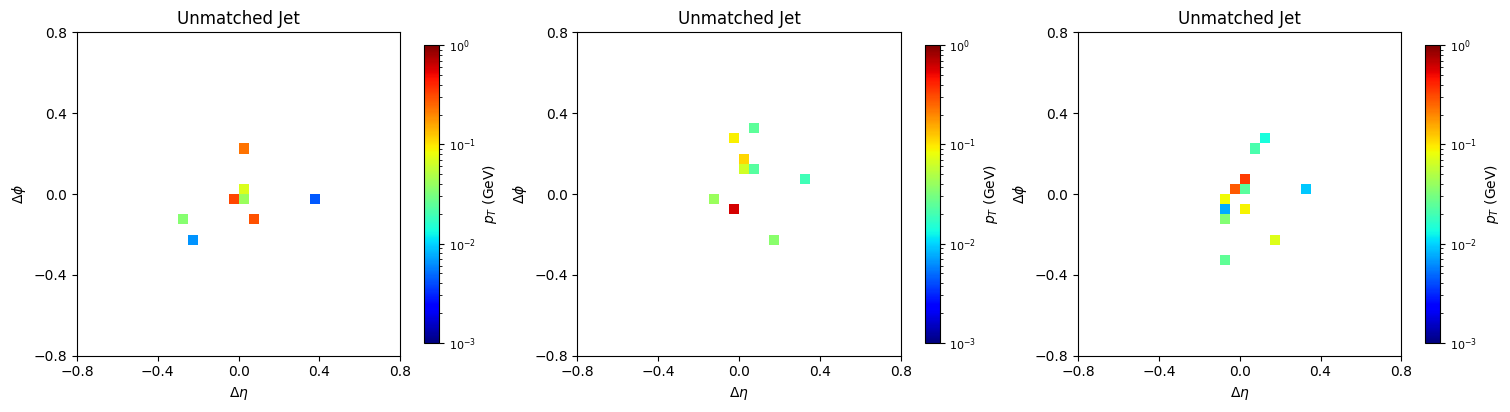


Processing batch: Events 60000 to 68055


Batch 60000: 100%|█████████████████████████| 8056/8056 [00:23<00:00, 344.99it/s]


Batch 60000-68055 saved: 15433 images
Time taken: 23.43 seconds



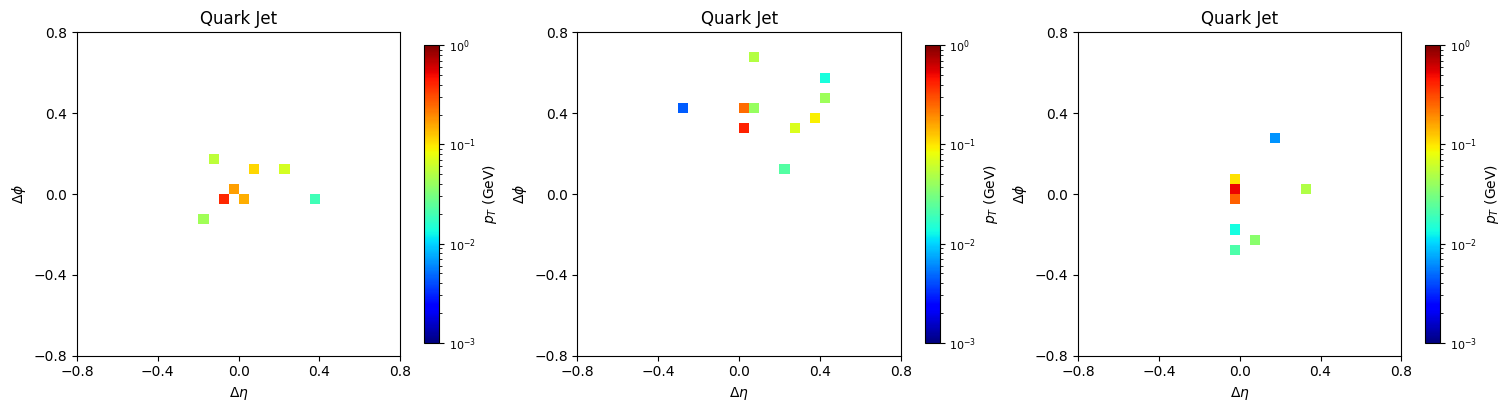

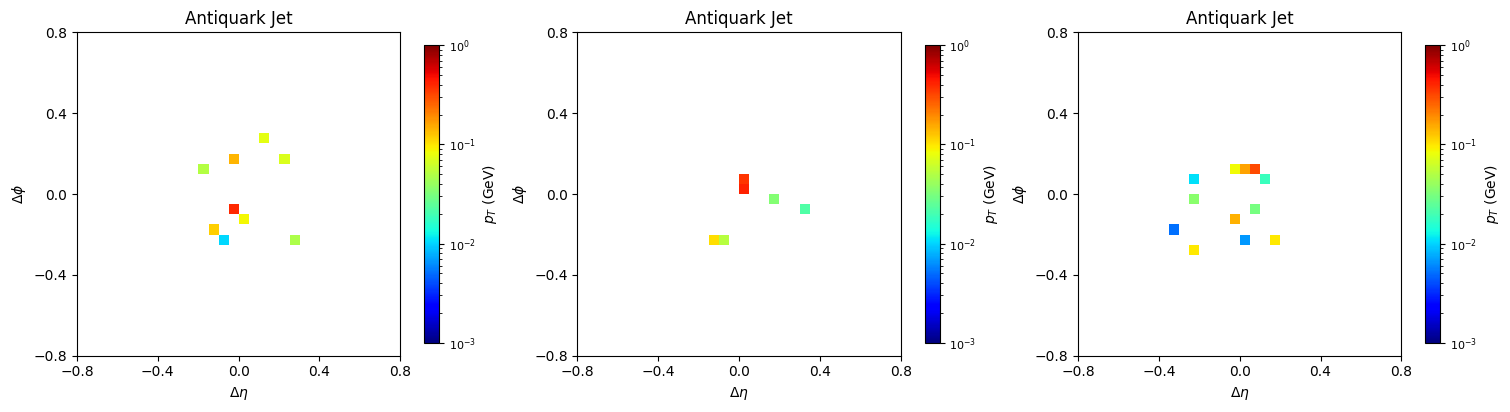

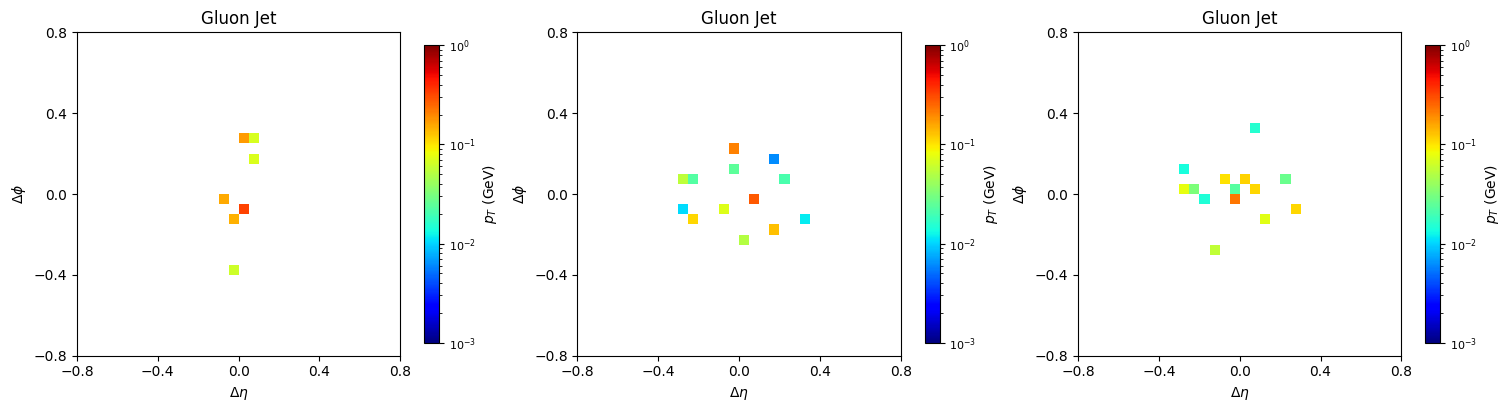

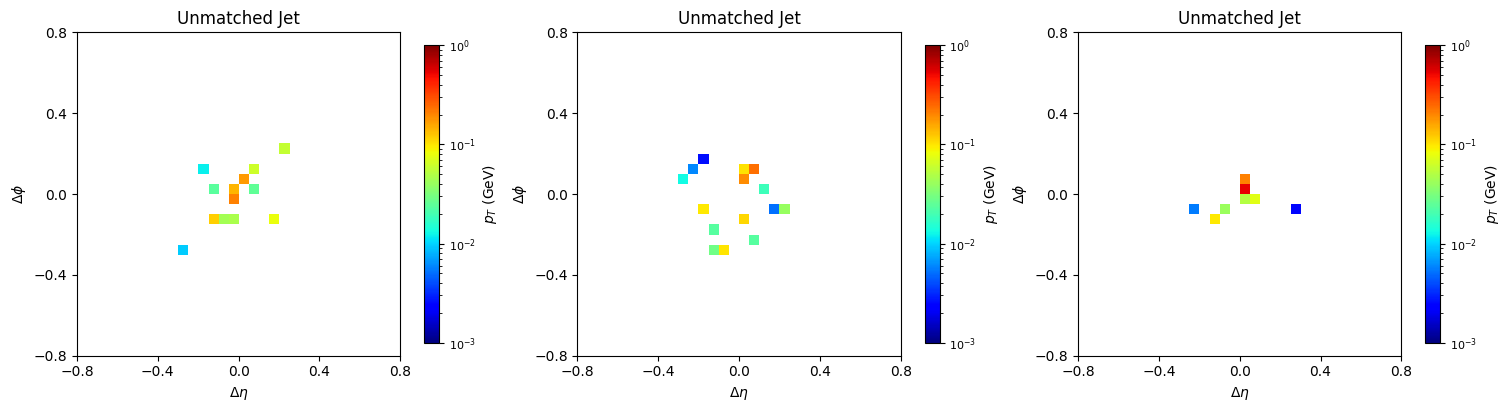

In [7]:
with h5py.File(jet_data_path, "r") as f:
    total_events = len(f.keys())
    print(f"\nTotal events in dataset: {total_events}")

    for batch_start in range(0, total_events, BATCH_SIZE):
        batch_end = min(batch_start + BATCH_SIZE, total_events)

        batch_images = []
        batch_labels = []
        batch_pts = []
        batch_etas = []
        batch_phis = []
        batch_charged_mults = []

        print(f"\nProcessing batch: Events {batch_start} to {batch_end - 1}")
        batch_start_time = time.time()

        for i in tqdm(range(batch_start, batch_end), desc=f"Batch {batch_start}"):
            event = f[f"event_{i}"]
            num_jets = len(event["pt"])
            tags = [tag.decode('utf-8') for tag in event["tag"][:]]

            for j in range(num_jets):
                jet_constituents = event[f"jet_{j}_constituents"][:]
                pt = event["pt"][j]
                eta = event["eta"][j]
                phi = event["phi"][j]
                n_charged = event["charge_multiplicity"][j]

                centered = center_jet(jet_constituents)
                rotated = rotate_jet(centered)
                image = create_jet_image(rotated, grids_full, eta_range_full, phi_range_full, normalize=normalize_intensity)

                if np.isclose(np.sum(image), 1.0, atol=1e-3):
                    batch_images.append(image)
                    batch_labels.append(tag_to_label.get(tags[j], 3))
                    batch_pts.append(pt)
                    batch_etas.append(eta)
                    batch_phis.append(phi)
                    batch_charged_mults.append(n_charged)

        batch_images = np.array(batch_images, dtype=np.float32)

        batch_labels = np.array(batch_labels, dtype=np.int32)
        batch_pts = np.array(batch_pts, dtype=np.float32)
        batch_etas = np.array(batch_etas, dtype=np.float32)
        batch_phis = np.array(batch_phis, dtype=np.float32)
        batch_charged_mults = np.array(batch_charged_mults, dtype=np.int32)

        np.save(full_jet_npy_file_path / f"qjet_imgs_batch_{batch_start}.npy", batch_images)
        np.save(full_jet_npy_file_path / f"qjet_lbls_batch_{batch_start}.npy", batch_labels)

        np.savez(
            full_jet_npy_file_path / f"qjet_metadata_batch_{batch_start}.npz",
            pt=batch_pts,
            eta=batch_etas,
            phi=batch_phis,
            n_charged=batch_charged_mults
        )

        batch_end_time = time.time()
        print(f"Batch {batch_start}-{batch_end - 1} saved: {batch_images.shape[0]} images")
        print(f"Time taken: {batch_end_time - batch_start_time:.2f} seconds\n")

        plot_sample_images(batch_images, batch_labels, tag_to_label, eta_range_full, phi_range_full, num_samples=3)


In [8]:
def compute_core_ratios(jet_constituents, jet_pt, total_charged, core_radius):
    pt = jet_constituents[:, 1]
    eta = jet_constituents[:, 2]
    phi = jet_constituents[:, 3]
    charge = jet_constituents[:, 4]

    eta_centroid = np.sum(pt * eta) / np.sum(pt)
    phi_centroid = np.sum(pt * phi) / np.sum(pt)

    d_eta = eta - eta_centroid
    d_phi = np.arctan2(np.sin(phi - phi_centroid), np.cos(phi - phi_centroid))
    d_r = np.sqrt(d_eta**2 + d_phi**2)

    core_mask = d_r < core_radius

    core_pt = np.sum(pt[core_mask])
    core_pt_ratio = core_pt / jet_pt if jet_pt > 0 else 0.0

    core_charged = np.count_nonzero(charge[core_mask])
    core_charged_ratio = core_charged / total_charged if total_charged > 0 else 0.0

    return core_pt_ratio, core_charged_ratio, core_mask


Total events in dataset: 68056

Processing batch: Events 0 to 9999


Batch 0: 100%|███████████████████████████| 10000/10000 [00:21<00:00, 467.53it/s]


Saved batch 0-9999 | Images: 18615 | Time: 21.45 sec


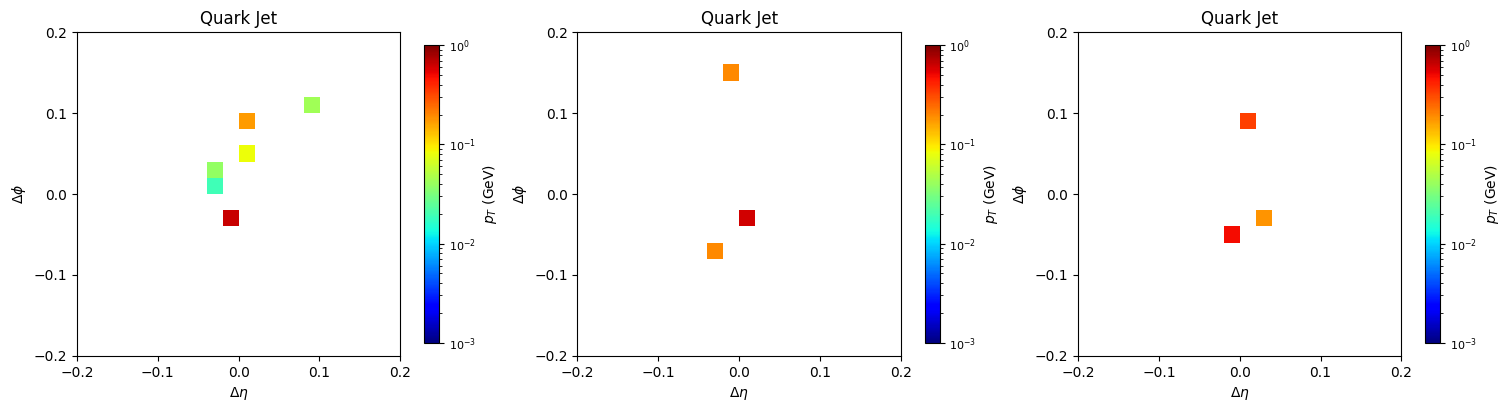

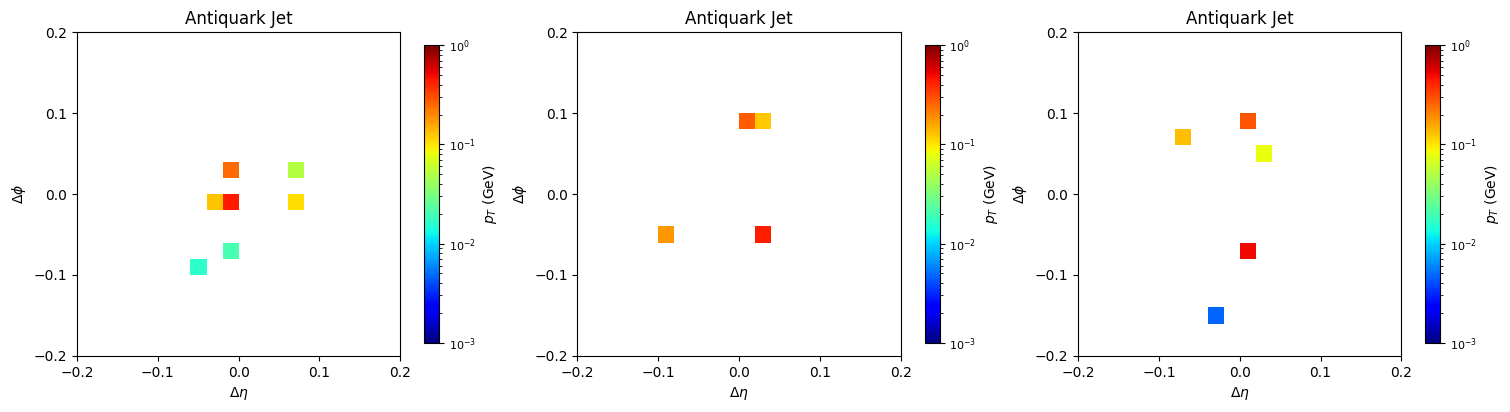

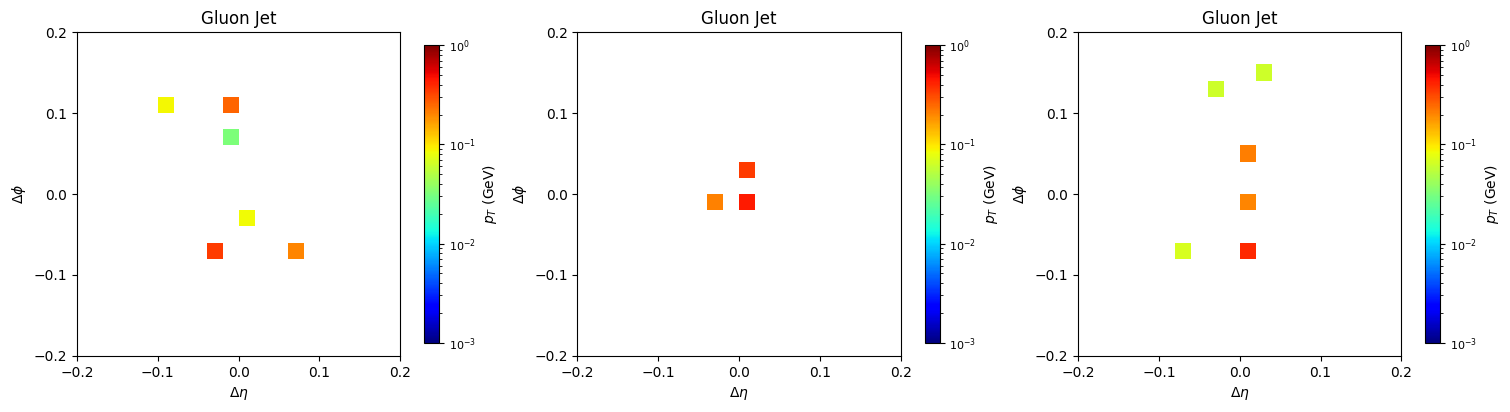

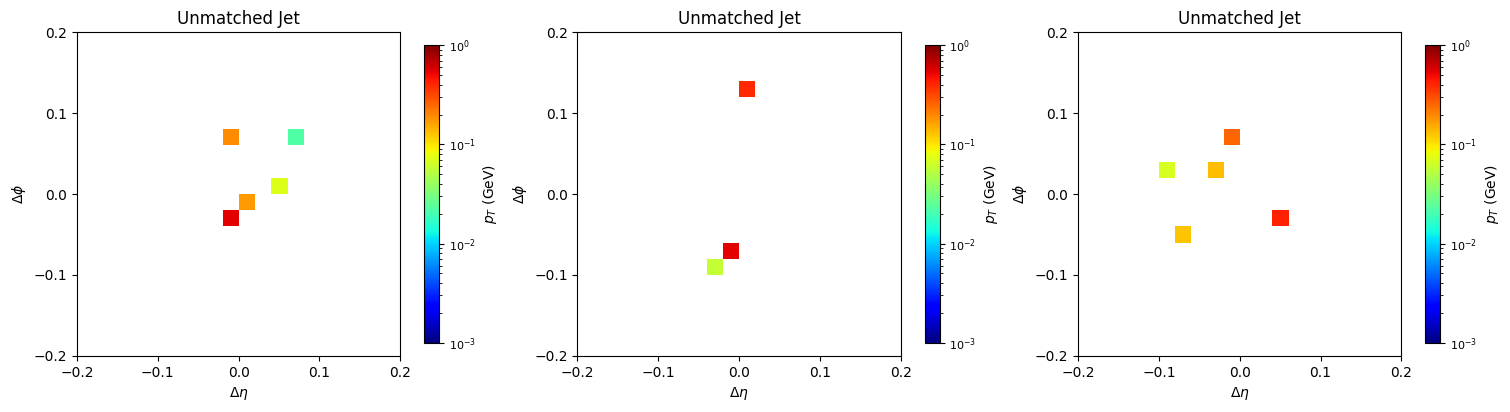


Processing batch: Events 10000 to 19999


Batch 10000: 100%|███████████████████████| 10000/10000 [00:19<00:00, 513.35it/s]


Saved batch 10000-19999 | Images: 18618 | Time: 19.54 sec


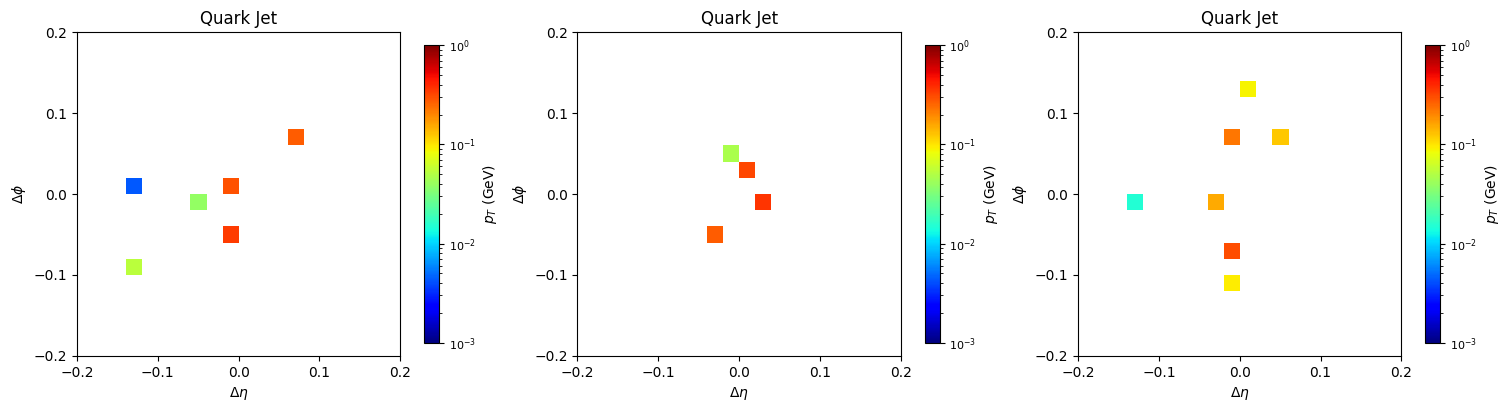

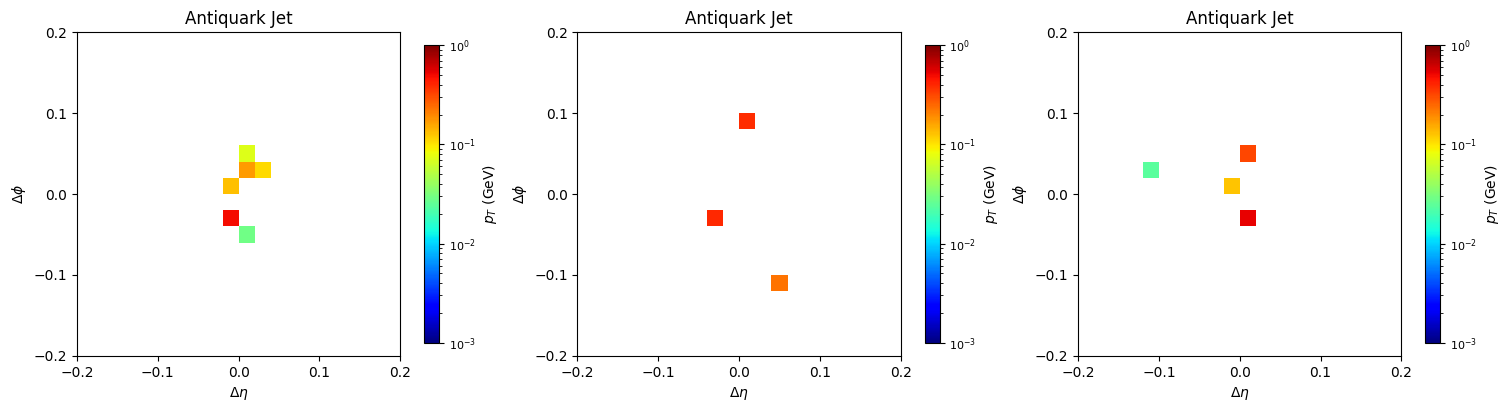

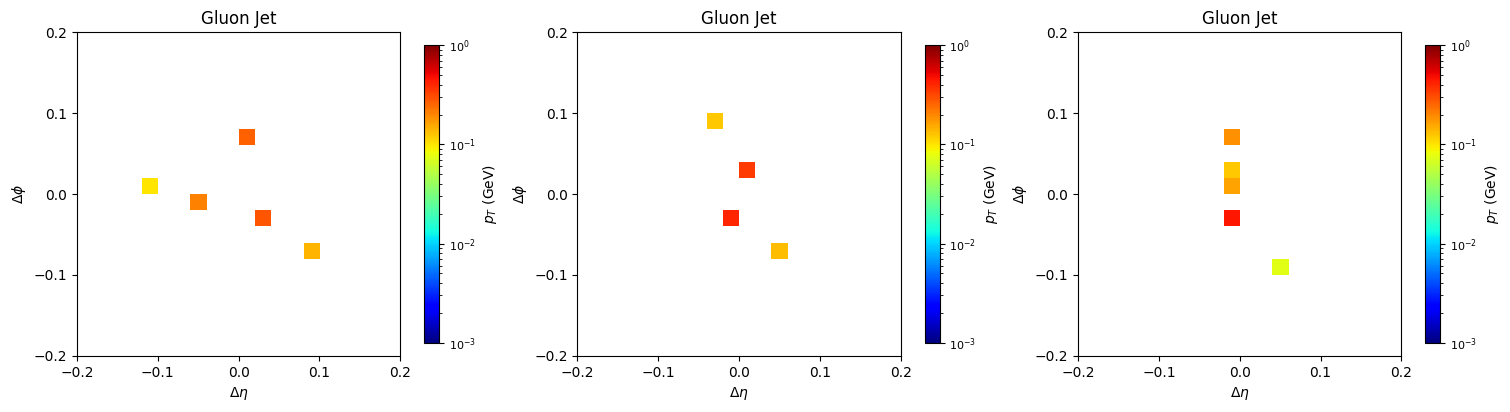

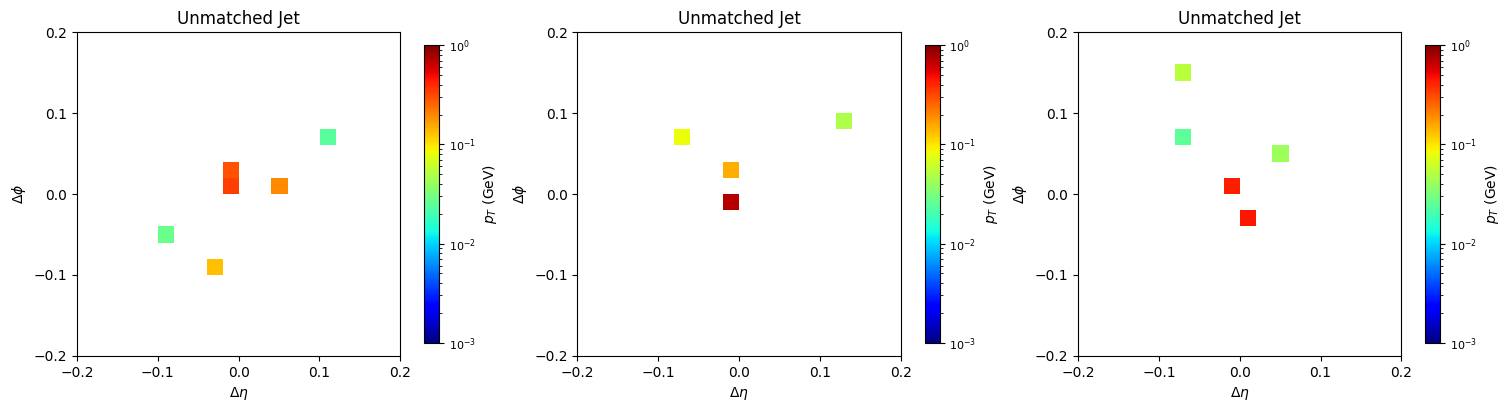


Processing batch: Events 20000 to 29999


Batch 20000: 100%|███████████████████████| 10000/10000 [00:20<00:00, 476.89it/s]


Saved batch 20000-29999 | Images: 18691 | Time: 21.04 sec


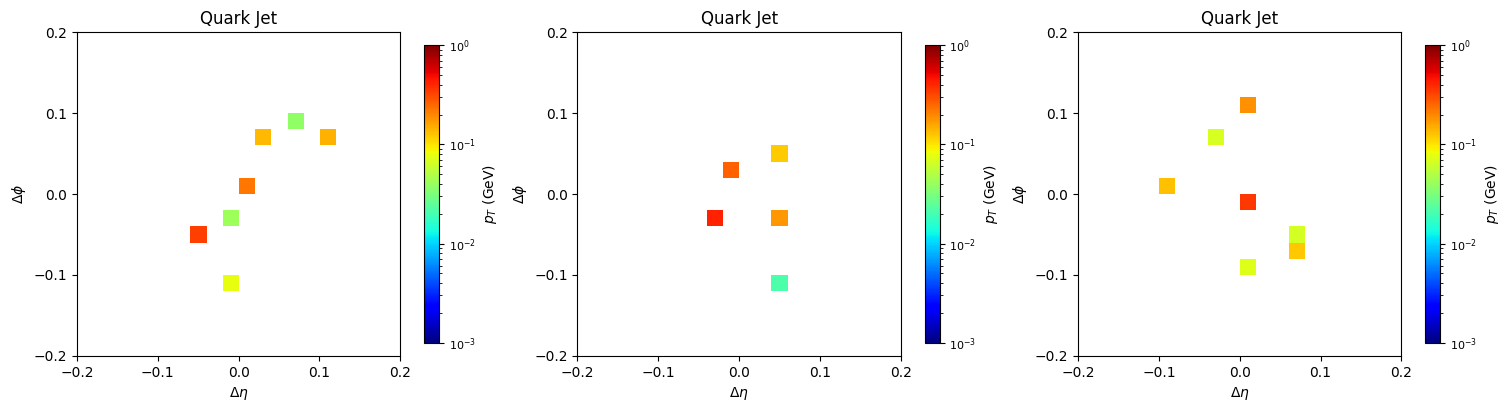

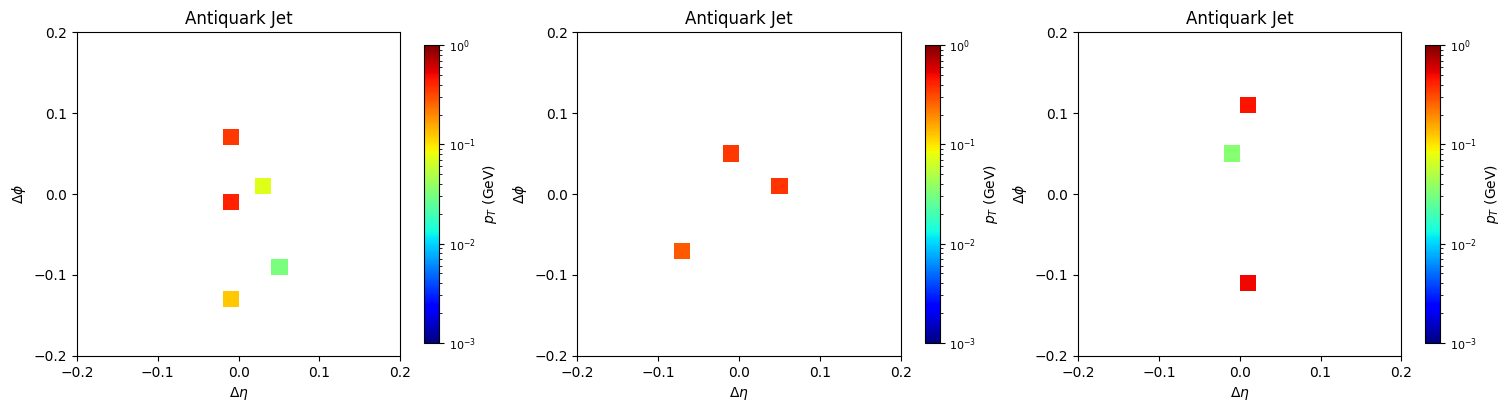

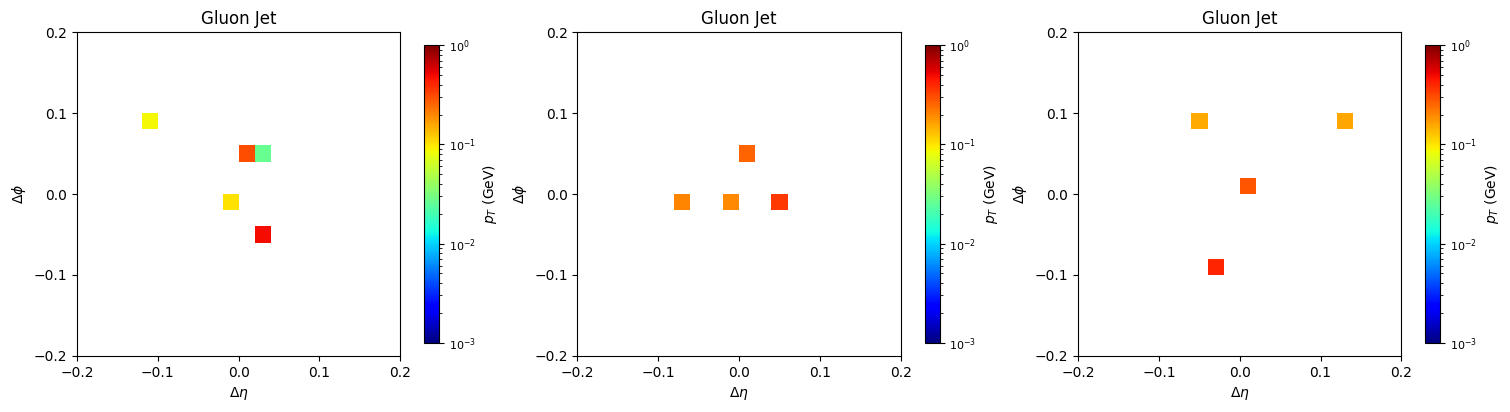

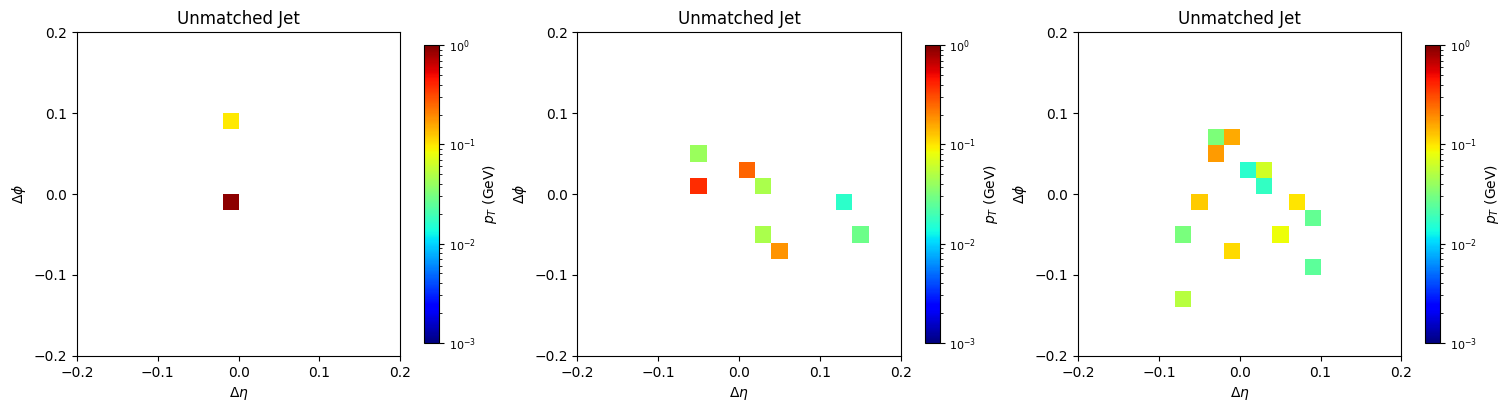


Processing batch: Events 30000 to 39999


Batch 30000: 100%|███████████████████████| 10000/10000 [00:20<00:00, 492.07it/s]


Saved batch 30000-39999 | Images: 18691 | Time: 20.38 sec


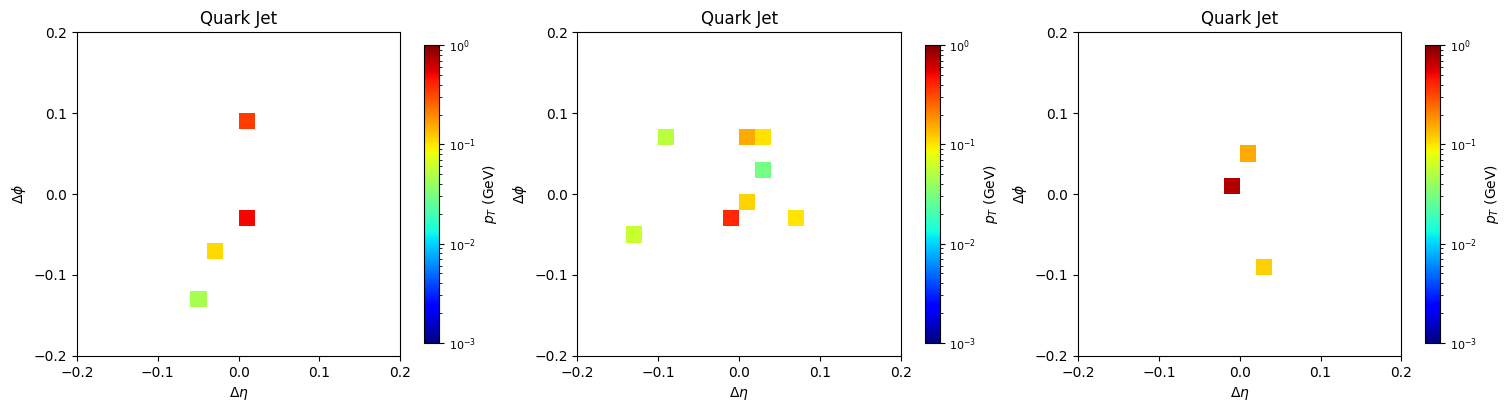

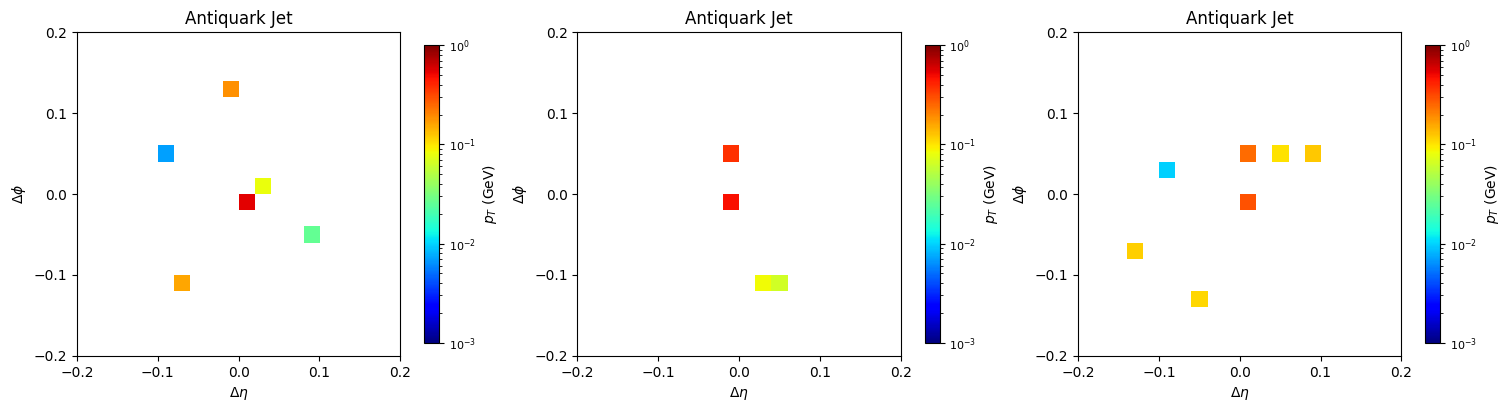

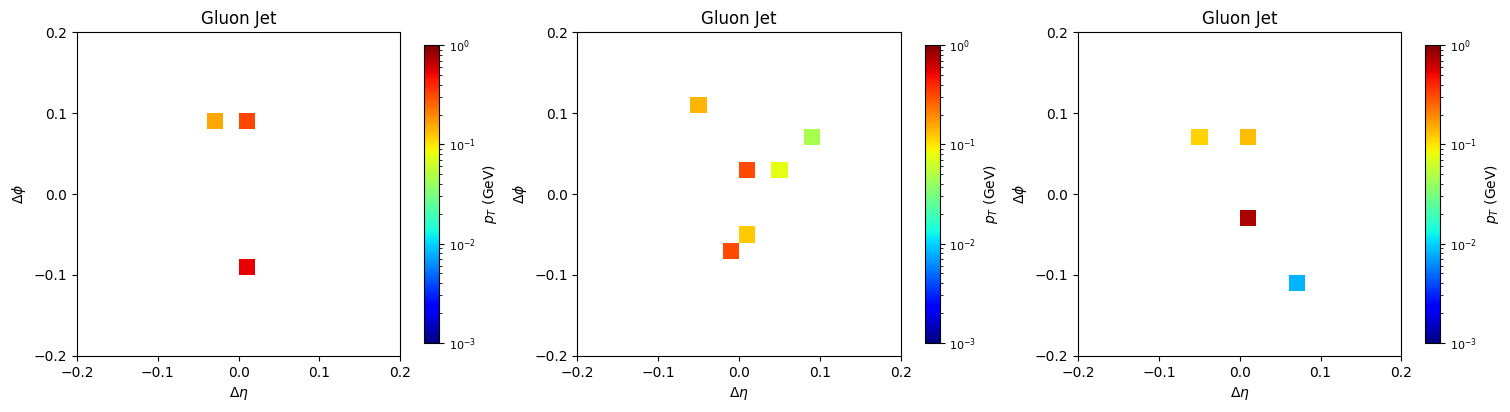

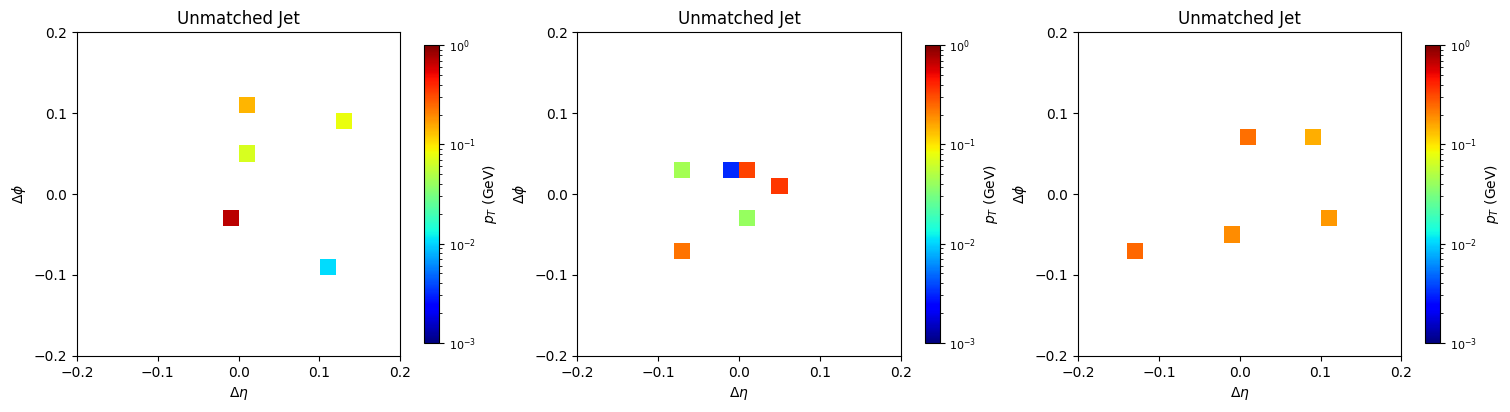


Processing batch: Events 40000 to 49999


Batch 40000: 100%|███████████████████████| 10000/10000 [00:18<00:00, 528.27it/s]


Saved batch 40000-49999 | Images: 18681 | Time: 18.98 sec


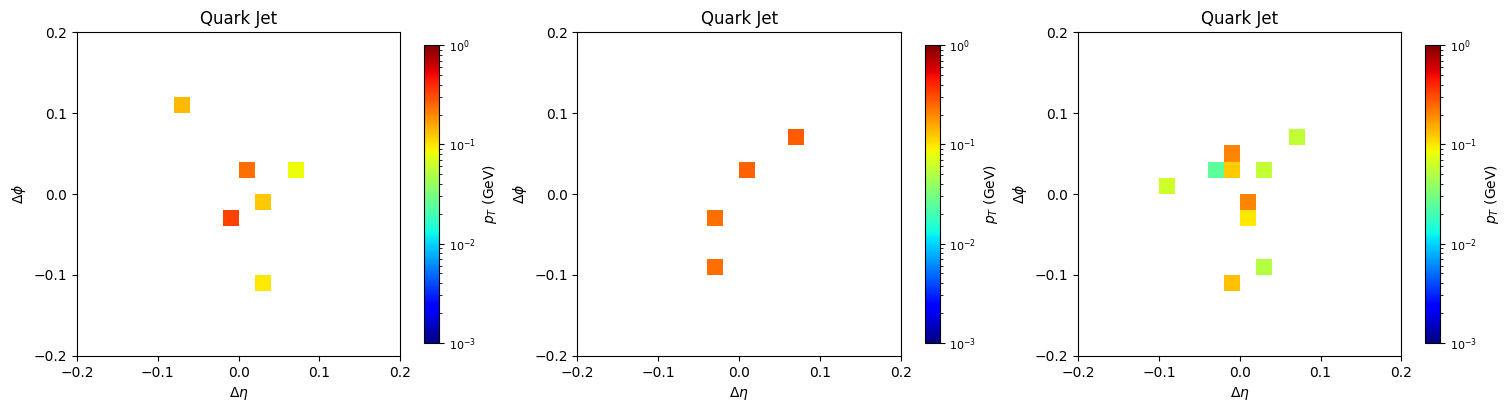

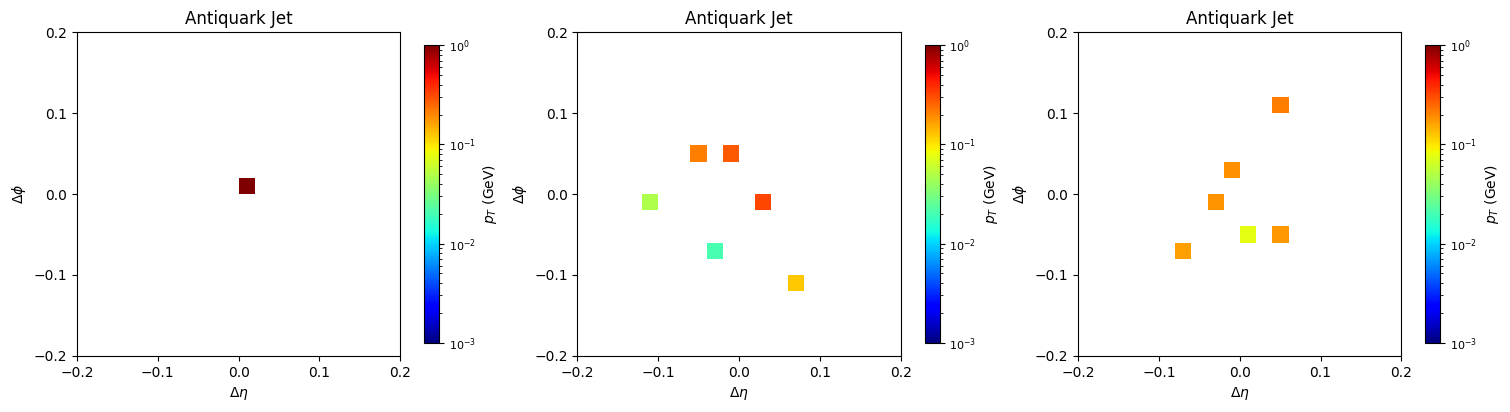

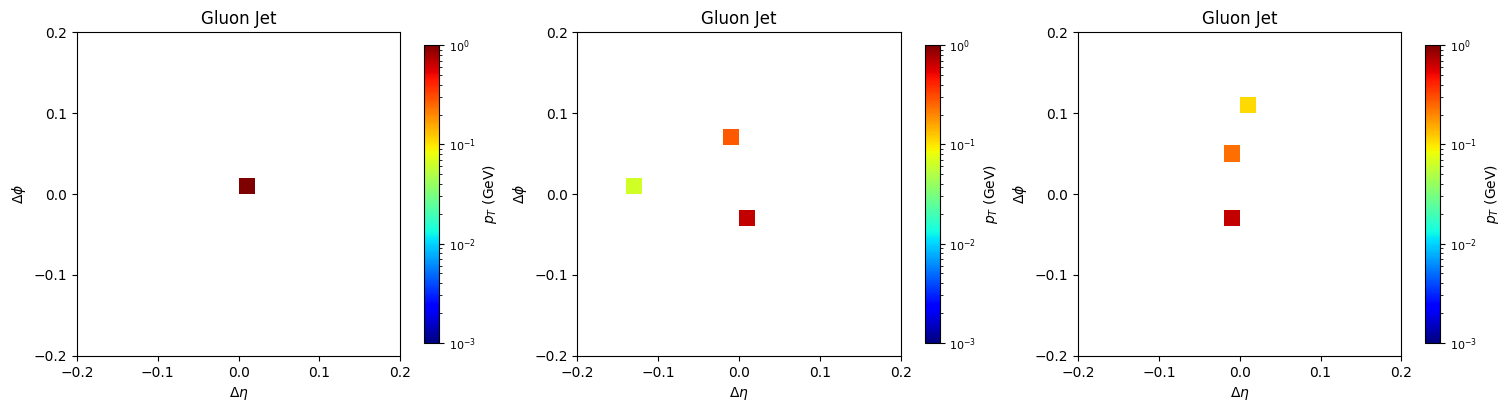

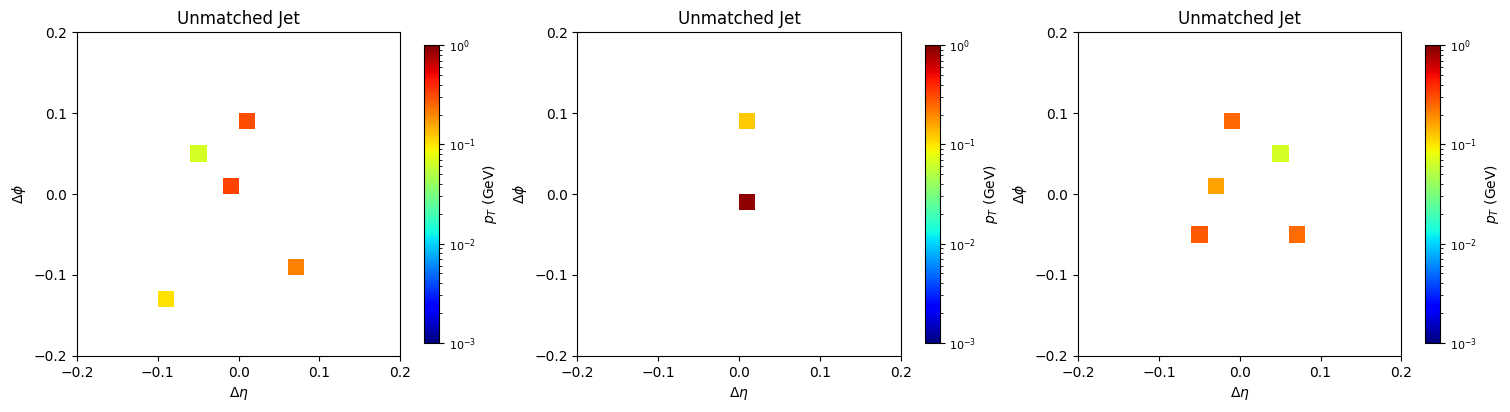


Processing batch: Events 50000 to 59999


Batch 50000: 100%|███████████████████████| 10000/10000 [00:18<00:00, 534.16it/s]


Saved batch 50000-59999 | Images: 18577 | Time: 18.77 sec


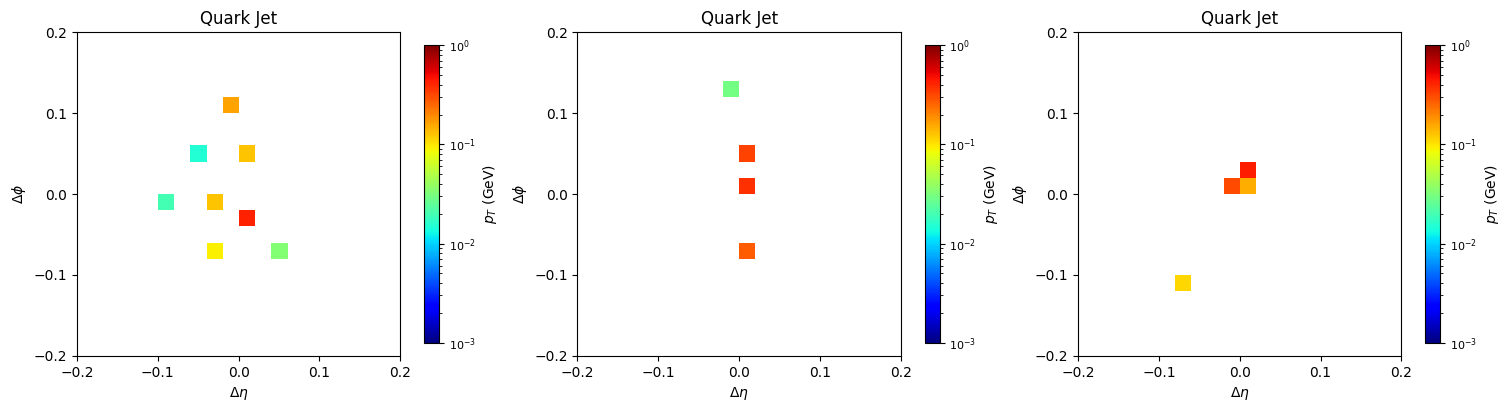

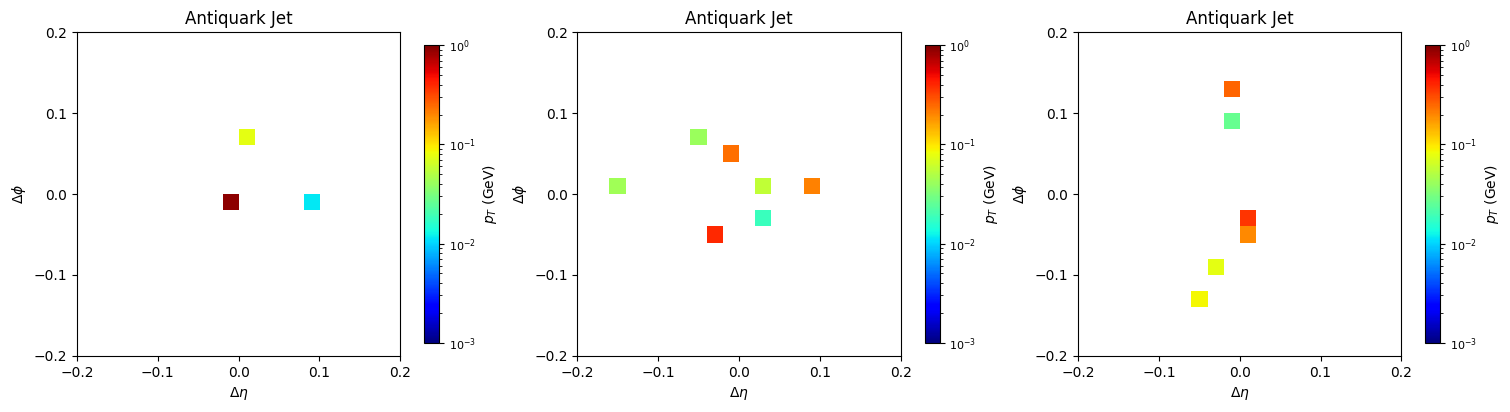

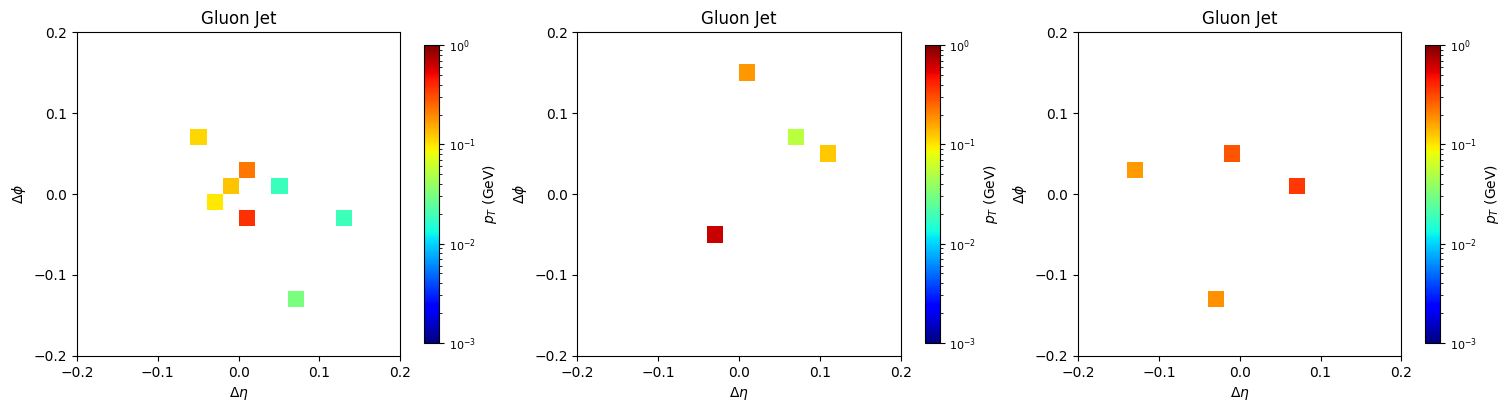

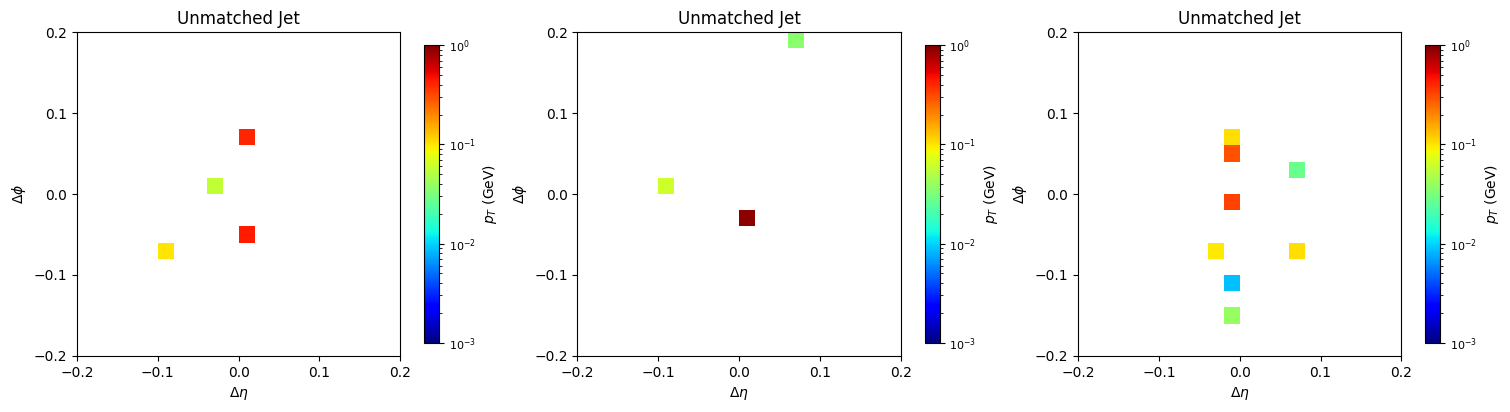


Processing batch: Events 60000 to 68055


Batch 60000: 100%|█████████████████████████| 8056/8056 [00:16<00:00, 493.74it/s]


Saved batch 60000-68055 | Images: 15096 | Time: 16.37 sec


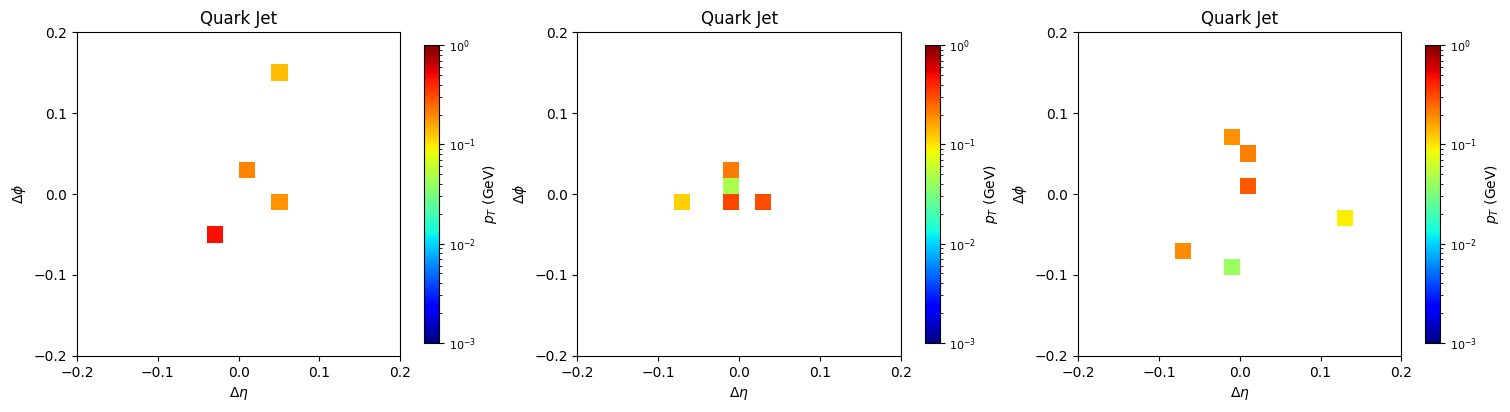

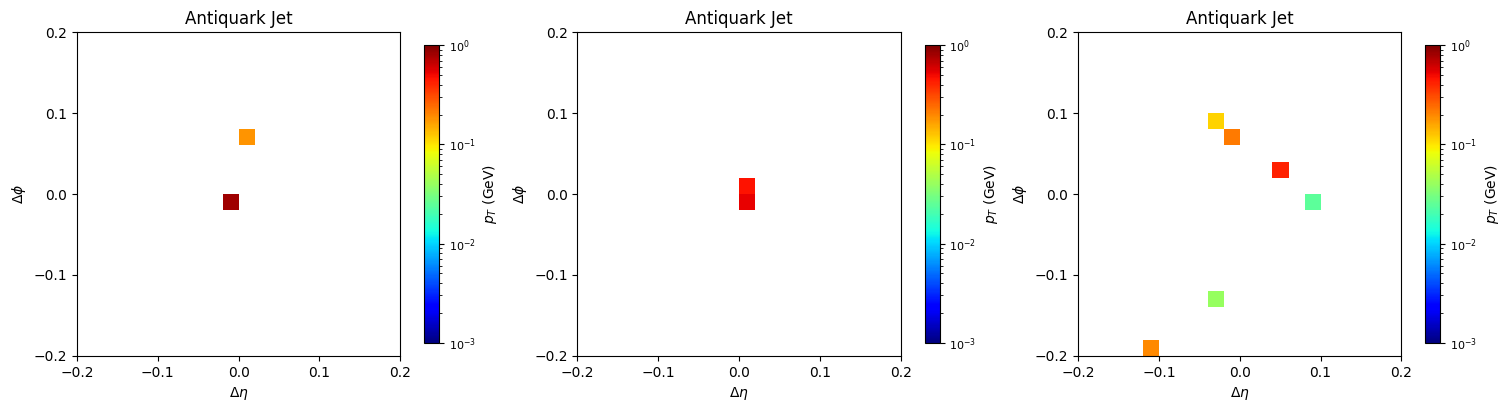

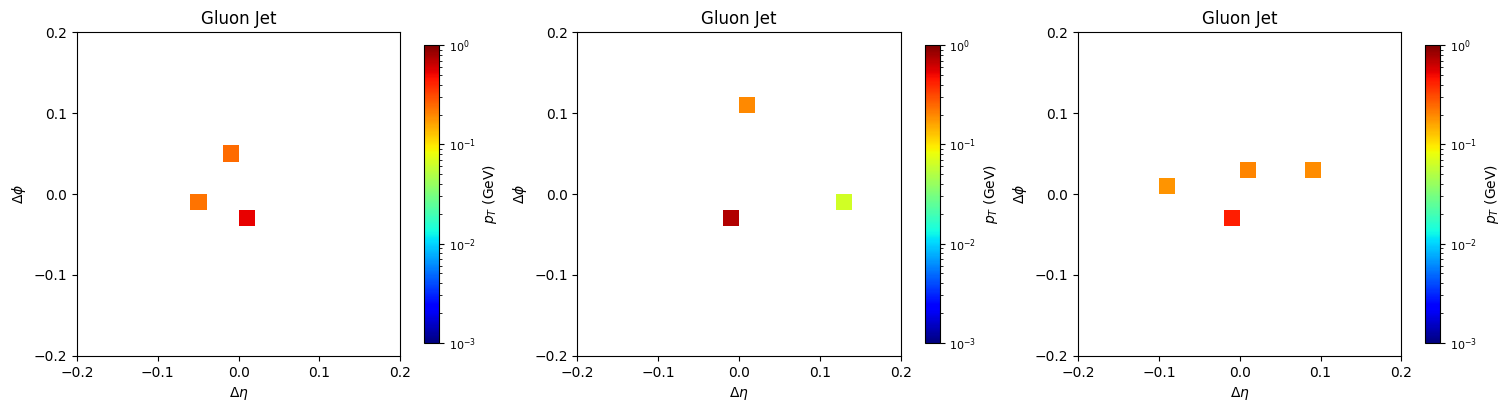

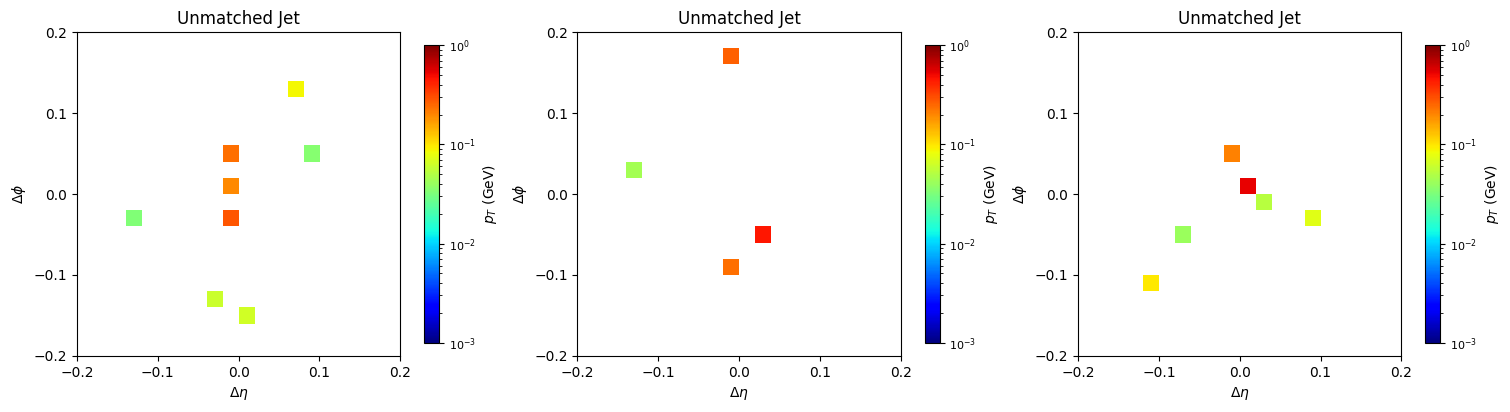

In [9]:
with h5py.File(jet_data_path, "r") as f:
    total_events = len(f.keys())
    print(f"\nTotal events in dataset: {total_events}")

    for batch_start in range(0, total_events, BATCH_SIZE):
        batch_end = min(batch_start + BATCH_SIZE, total_events)

        batch_core_images = []
        batch_core_labels = []
        batch_core_pt_ratios = []
        batch_core_charged_ratios = []

        print(f"\nProcessing batch: Events {batch_start} to {batch_end - 1}")
        start_time = time.time()

        for i in tqdm(range(batch_start, batch_end), desc=f"Batch {batch_start}"):
            event = f[f"event_{i}"]
            num_jets = len(event["pt"])
            tags = [tag.decode('utf-8') for tag in event["tag"][:]]
            pts = event["pt"][:]
            n_charged_all = event["charge_multiplicity"][:]

            for j in range(num_jets):
                label = tag_to_label.get(tags[j], 3)
                pt_jet = pts[j]
                total_charged = n_charged_all[j]
                constituents = event[f"jet_{j}_constituents"][:]

                core_pt_ratio, core_charged_ratio, core_mask = compute_core_ratios(
                    constituents, pt_jet, total_charged, jet_core_r
                )

                core_constituents = constituents[core_mask]
                if len(core_constituents) == 0:
                    continue

                centered = center_jet(core_constituents)
                rotated = rotate_jet(centered)
                image = create_jet_image(rotated, grids_core, eta_range_core, phi_range_core, normalize=True)

                if np.isclose(np.sum(image), 1.0, atol=1e-3):
                    batch_core_images.append(image)
                    batch_core_labels.append(label)
                    batch_core_pt_ratios.append(core_pt_ratio)
                    batch_core_charged_ratios.append(core_charged_ratio)

        batch_core_images = np.array(batch_core_images, dtype=np.float32)

        batch_core_labels = np.array(batch_core_labels, dtype=np.int32)
        batch_core_pt_ratios = np.array(batch_core_pt_ratios, dtype=np.float32)
        batch_core_charged_ratios = np.array(batch_core_charged_ratios, dtype=np.float32)

        np.save(core_jet_npy_file_path / f"core_images_batch_{batch_start}_qjet.npy", batch_core_images)
        np.save(core_jet_npy_file_path / f"core_labels_batch_{batch_start}_qjet.npy", batch_core_labels)
        np.savez(
            core_jet_npy_file_path / f"core_metadata_batch_{batch_start}_qjet.npz",
            core_pt_ratio=batch_core_pt_ratios,
            core_charged_ratio=batch_core_charged_ratios
        )

        end_time = time.time()
        print(f"Saved batch {batch_start}-{batch_end - 1} | Images: {len(batch_core_images)} | Time: {end_time - start_time:.2f} sec")

        plot_sample_images(batch_core_images, batch_core_labels, tag_to_label, eta_range_core, phi_range_core, num_samples=3)